In [48]:
%matplotlib inline
import pandas as pd
import cuzcatlan as cusca
import seaborn as sns
from matplotlib import pyplot as plt
import catheat
from cycler import cycler
from matplotlib.colors import ListedColormap
import numpy as np
from matplotlib.patches import Patch

In [2]:
# loading patient data from netanely et al.
netanely = pd.read_excel('13058_2016_724_MOESM2_ESM.xlsx',sheet_name='RNA-Seq 1148')
netanely.set_index('Sample ID', inplace=True)
netanely

Cluster ID Age (Median) ER Status PR Status Her2 Status  \
Sample ID                                                                  
TCGA-BH-A0C7-01           1           48  Positive  Negative    Positive   
TCGA-A8-A06N-01           1           66  Positive  Negative    Negative   
TCGA-D8-A1XU-01           1           56  Positive  Positive    Negative   
TCGA-AR-A0TV-01           1           66  Positive  Positive    Negative   
TCGA-D8-A1XV-01           1           84  Positive  Positive    Negative   
TCGA-AN-A03Y-01           1           66  Positive  Positive    Negative   
TCGA-A8-A08I-01           1           53  Positive  Positive    Negative   
TCGA-E9-A1N3-01           1           70       NaN       NaN    Negative   
TCGA-C8-A1HE-01           1           59  Positive  Positive    Negative   
TCGA-A1-A0SQ-01           1           45  Positive  Positive    Negative   
TCGA-A7-A6VX-01           1           68  Positive  Positive         NaN   
TCGA-B6-A401-01           1           47  Positive  Positive         NaN   
TCGA-D8-A1XG-01           1           86  Positive  Negative    Negative   
TCGA-E9-A1R3-01           1           70       NaN       NaN    Negative   
TCGA-A8-A08Z-01           1           76  Positive  Positive    Negative   
TCGA-EW-A1P0-01           1           55  Positive  Negative    Negative   
TCGA-A8-A06O-01           1           60  Positive  Positive    Negative   
TCGA-BH-A6R8-01           1           46  Positive  Positive         NaN   
TCGA-E9-A5UO-01           1           41       NaN       NaN         NaN   
TCGA-B6-A0IA-01           1           51  Positive  Positive    Negative   
TCGA-D8-A1XA-01           1           64  Positive  Positive    Negative   
TCGA-E2-A15G-01           1           76  Positive  Positive    Negative   
TCGA-C8-A26Z-01           1           59  Positive  Positive    Negative   
TCGA-BH-A0EI-01           1           51  Positive  Positive    Negative   
TCGA-A7-A0DC-01           1           63  Positive  Negative    Negative   
TCGA-A7-A0CJ-01           1           57  Positive  Positive    Negative   
TCGA-A8-A09E-01           1           73  Positive  Positive         NaN   
TCGA-AR-A24Z-01           1           57  Positive  Positive    Negative   
TCGA-E2-A15T-01           1           65  Positive  Positive    Negative   
TCGA-D8-A13Y-01           1           52  Positive  Positive    Negative   
...                     ...          ...       ...       ...         ...   
TCGA-E2-A108-01           5           64  Positive  Positive    Negative   
TCGA-HN-A2OB-01           5           45  Positive  Positive         NaN   
TCGA-BH-A18R-11           5       Normal       NaN       NaN         NaN   
TCGA-AC-A23H-11           5       Normal       NaN       NaN         NaN   
TCGA-BH-A1FE-11           5       Normal       NaN       NaN         NaN   
TCGA-BH-A0DQ-11           5       Normal       NaN       NaN         NaN   
TCGA-A2-A25A-01           5           44  Positive  Positive    Negative   
TCGA-BH-A0B5-11           5       Normal       NaN       NaN         NaN   
TCGA-AC-A2FK-01           5           45  Positive  Positive         NaN   
TCGA-BH-A18M-11           5       Normal       NaN       NaN         NaN   
TCGA-W8-A86G-01           5           66  Positive  Positive         NaN   
TCGA-BH-A1F2-11           5       Normal       NaN       NaN         NaN   
TCGA-BH-A1FJ-11           5       Normal       NaN       NaN         NaN   
TCGA-EW-A1P1-01           5           68  Negative  Negative    Negative   
TCGA-BH-A1FM-11           5       Normal       NaN       NaN         NaN   
TCGA-E2-A153-11           5       Normal       NaN       NaN         NaN   
TCGA-AO-A0JB-01           5           50  Positive  Positive    Negative   
TCGA-E9-A1RD-11           5       Normal       NaN       NaN         NaN   
TCGA-E2-A15I-11           5       Normal       NaN       NaN         NaN   
TCGA-BH-A0E0-11           5       Normal       NaN       NaN     

In [3]:
# We will comapre this with normalized RNA Seq counts
rna_samples_name = 'selected_patients.gct'  #For now we will use these, but we will then swap for all ~1100 samples
# rna_samples_name = 'https://datasets.genepattern.org/data/TCGA_BRCA_temp/TCGA_BRCA_all_matched.filtered.gct'
rna_samples_name = 'https://datasets.genepattern.org/data/TCGA_BRCA_temp/TCGA_BRCA_all_collapsed.gct'
# rna_samples_name = 'https://datasets.genepattern.org/data/TCGA_BRCA_temp/TCGA_BRCA_all_collapsed.gct'
# rna_samples_name = 'https://datasets.genepattern.org/data/test_data/BRCA_minimal_60x19.gct'
all_rna_samples = pd.read_table(rna_samples_name, skiprows=2, index_col=0)
# Now var filter and choose two 2000
rna = all_rna_samples.loc[all_rna_samples.var(axis=1).sort_values(ascending=False).iloc[:200].index]

# Delete this once columns need no renaming
rna.columns = [i[0:15] for i in list(rna)]
rna

Description  TCGA-A8-A07U-01  \
Name                                                                           
CPB1                                    carboxypeptidase B1              7.0   
MT-RNR2                     mitochondrially encoded 16S RNA         457735.0   
COL1A1                        collagen type I alpha 1 chain         291257.0   
IGHG1     immunoglobulin heavy constant gamma 1 (G1m mar...        2042686.0   
MT-CO1       mitochondrially encoded cytochrome c oxidase I         582565.0   
MT-ND4    mitochondrially encoded NADH:ubiquinone oxidor...         594343.0   
FN1                                           fibronectin 1         217682.0   
COL1A2                        collagen type I alpha 2 chain         197702.0   
COL3A1                      collagen type III alpha 1 chain         158979.0   
7SK                                                 7SK RNA            136.0   
SCGB2A2                    secretoglobin family 2A member 2           7878.0   
MT-CO3     mitochondrially encoded cytochrome c oxidase III         376251.0   
MT-CO2      mitochondrially encoded cytochrome c oxidase II         424546.0   
MT-CYB                 mitochondrially encoded cytochrome b         245337.0   
IGFBP5         insulin like growth factor binding protein 5          17259.0   
MGP                                      matrix Gla protein         101899.0   
CSN2                                            casein beta              0.0   
LTF                                        lactotransferrin         249234.0   
IGKC                          immunoglobulin kappa constant         719507.0   
MT-ND2    mitochondrially encoded NADH:ubiquinone oxidor...         317912.0   
CHGA                                         chromogranin A              6.0   
MT-ND1    mitochondrially encoded NADH:ubiquinone oxidor...         210891.0   
EEF1A1    eukaryotic translation elongation factor 1 alp...         178248.0   
MT-RNR1                     mitochondrially encoded 12S RNA          62088.0   
SPARC             secreted protein acidic and cysteine rich          87958.0   
MT-ATP6              mitochondrially encoded ATP synthase 6         335719.0   
APOD                                       apolipoprotein D           3659.0   
MT-ND5    mitochondrially encoded NADH:ubiquinone oxidor...         234125.0   
ACTB                                             actin beta         307883.0   
RPL19                                 ribosomal protein L19          35867.0   
...                                                     ...              ...   
FLNB                                              filamin B          27984.0   
ANPEP                       alanyl aminopeptidase, membrane           3276.0   
THBS1                                      thrombospondin 1          13102.0   
S100A8                      S100 calcium binding protein A8          11933.0   
RPS11                                 ribosomal protein S11          32236.0   
RPS12                                 ribosomal protein S12          31493.0   
RPL10                                 ribosomal protein L10          47495.0   
CALR                                           calreticulin          60490.0   
GFRA1                          GDNF family receptor alpha 1            773.0   
IGFBP4         insulin like growth factor binding protein 4          19358.0   
IGHG3     immunoglobulin heavy constant gamma 3 (G3m mar...          87228.0   
RPS8                                   ribosomal protein S8          26515.0   
SLC40A1                   solute carrier family 40 member 1           5586.0   
GATA3                                GATA binding protein 3           5544.0   
CANX                                               calnexin          57400.0   
RACK1                     receptor for activated C kinase 1          38820.0   
TBC1D9                          TBC1 domain family member 9           3818.0   
TFF1                                       trefo

In [4]:
#cusca.df2gct(rna,name='RNA_TEST.gct')

In [5]:
# rna = 'https://datasets.genepattern.org/data/test_data/BRCA_minimal_60x19.gct'
# pd.read_table(rna_samples_name, skiprows=2, index_col=0)

In [ ]:
base_name = 'HC_output_IC'
model = cusca.HierarchicalClustering(pwd = '.',
                              gct_name = rna,
                              col_distance_metric = 'information_coefficient',
                              row_distance_metric = 'No_row_clustering',
                              clustering_method = 'average',#'complete',
                              output_base_name = base_name,
                              row_normalization = True,
                              col_normalization = True,
                              row_centering = 'Mean',
                              col_centering = 'Mean',
                              output_distances=False,
                              custom_plot = 'Samples',
                              clusters_to_highlight = 5,
                              show = True)
print("Done with Hierarchical Clustering!")

In [70]:
f = open(base_name+'.cls')
f.readline()
f.readline()
hc_clusters = f.readline().strip('\n').split(' ')
f.close()

In [71]:
hc_df = pd.DataFrame(columns=list(rna))
hc_df.loc['hc_clusters',:] = hc_clusters
# hc_df.apply(lambda x: ['hc-'+i for i in x], axis=1)
hc_df

TCGA-A8-A07U-01 TCGA-D8-A1JM-01 TCGA-AN-A0AT-01 TCGA-EW-A3E8-01  \
hc_clusters               0               0               0               1   

            TCGA-A8-A085-01 TCGA-AO-A1KQ-01 TCGA-BH-A0E0-01 TCGA-D8-A1JS-01  \
hc_clusters               2               1               3               3   

            TCGA-E2-A2P5-01 TCGA-D8-A1J9-01       ...       TCGA-A2-A0SX-01  \
hc_clusters               2               0       ...                     0   

            TCGA-AO-A12G-01 TCGA-AC-A2FB-01 TCGA-BH-A1FD-11 TCGA-A7-A13F-11  \
hc_clusters               1               0               2               2   

            TCGA-AC-A3TM-01 TCGA-E9-A1N6-01 TCGA-OL-A6VO-01 TCGA-OL-A5RV-01  \
hc_clusters               1               4               0               3   

            TCGA-OL-A66H-01  
hc_clusters               3  

[1 rows x 1204 columns]

In [72]:

# netanely[['Cluster ID','PAM50']].transpose()


In [73]:
in_common = list(set(netanely.index) & set(hc_df))
print(len(in_common))
netanely_ids = netanely[['Cluster ID','PAM50']].transpose()[in_common]
netanely_ids

1141


Sample ID  TCGA-OL-A66I-01 TCGA-BH-A5IZ-01 TCGA-E9-A1NA-11 TCGA-AO-A126-01  \
Cluster ID               4               4               5               1   
PAM50                Basal           Basal          Normal            LumA   

Sample ID  TCGA-A8-A06P-01 TCGA-E2-A158-11 TCGA-B6-A0RG-01 TCGA-AR-A24W-01  \
Cluster ID               1               5               1               5   
PAM50                 LumA          Normal            LumA            LumA   

Sample ID  TCGA-C8-A1HN-01 TCGA-E9-A1RB-01       ...       TCGA-AR-A24M-01  \
Cluster ID               1               1       ...                     1   
PAM50                 LumB            LumB       ...                  LumA   

Sample ID  TCGA-BH-A1FN-01 TCGA-B6-A0X1-01 TCGA-A2-A0YF-01 TCGA-A2-A0YG-01  \
Cluster ID               3               4               1               3   
PAM50                 LumB           Basal            LumA            LumB   

Sample ID  TCGA-E9-A243-01 TCGA-E9-A2JT-01 TCGA-A2-A04Q-01 TCGA-AO-A0JM-01  \
Cluster ID               4               2               4               3   
PAM50                Basal            LumA           Basal            LumB   

Sample ID  TCGA-D8-A13Y-01  
Cluster ID               1  
PAM50                 LumB  

[2 rows x 1141 columns]

In [74]:
hc_df.loc['PAM50'] = netanely_ids.loc['PAM50']
hc_df.loc['Cluster ID'] = netanely_ids.loc['Cluster ID'].apply(lambda x: 'N-'+str(x))

In [75]:
hc_df

TCGA-A8-A07U-01 TCGA-D8-A1JM-01 TCGA-AN-A0AT-01 TCGA-EW-A3E8-01  \
hc_clusters               0               0               0               1   
PAM50                 Basal           Basal           Basal            LumA   
Cluster ID              N-4             N-4             N-4             N-2   

            TCGA-A8-A085-01 TCGA-AO-A1KQ-01 TCGA-BH-A0E0-01 TCGA-D8-A1JS-01  \
hc_clusters               2               1               3               3   
PAM50                   NaN             NaN           Basal            LumA   
Cluster ID              NaN             NaN             N-4             N-1   

            TCGA-E2-A2P5-01 TCGA-D8-A1J9-01       ...       TCGA-A2-A0SX-01  \
hc_clusters               2               0       ...                     0   
PAM50                  LumA            LumB       ...                 Basal   
Cluster ID              N-1             N-3       ...                   N-4   

            TCGA-AO-A12G-01 TCGA-AC-A2FB-01 TCGA-BH-A1FD-11 TCGA-A7-A13F-11  \
hc_clusters               1               0               2               2   
PAM50                  LumA            LumA          Normal          Normal   
Cluster ID              N-2             N-2             N-5             N-5   

            TCGA-AC-A3TM-01 TCGA-E9-A1N6-01 TCGA-OL-A6VO-01 TCGA-OL-A5RV-01  \
hc_clusters               1               4               0               3   
PAM50                   NaN            LumB           Basal            LumA   
Cluster ID              NaN             N-3             N-4             N-2   

            TCGA-OL-A66H-01  
hc_clusters               3  
PAM50                  LumA  
Cluster ID              N-1  

[3 rows x 1204 columns]

In [76]:
# Read CDT file for ordering of columns
f = open(base_name+'.cdt')
ordered_samples = [i for i in f.readline().strip('\n').split('\t') if ((i!='ID') and (i!='Name') and (i!='GWEIGHT') and (i!='GID') )]
ordered_samples = [i for i in reversed(ordered_samples)]
f.close()
print(ordered_samples)

['TCGA-AR-A0TY-01', 'TCGA-AN-A0AM-01', 'TCGA-B6-A0IO-01', 'TCGA-B6-A0IG-01', 'TCGA-AN-A0AK-01', 'TCGA-BH-A0H9-01', 'TCGA-AO-A0JD-01', 'TCGA-BH-A1FD-01', 'TCGA-BH-A18R-01', 'TCGA-AR-A0TW-01', 'TCGA-B6-A0I9-01', 'TCGA-A2-A0YG-01', 'TCGA-E2-A14P-01', 'TCGA-BH-A203-01', 'TCGA-BH-A18U-01', 'TCGA-AN-A0AJ-01', 'TCGA-E2-A14V-01', 'TCGA-C8-A137-01', 'TCGA-AO-A12D-01', 'TCGA-E9-A1RH-01', 'TCGA-A8-A09G-01', 'TCGA-A2-A0EY-01', 'TCGA-D8-A1JF-01', 'TCGA-E2-A1LB-01', 'TCGA-LL-A740-01', 'TCGA-OL-A5D6-01', 'TCGA-C8-A135-01', 'TCGA-A2-A0CX-01', 'TCGA-BH-A0AW-01', 'TCGA-E2-A1LE-01', 'TCGA-A2-A04W-01', 'TCGA-C8-A131-01', 'TCGA-B6-A1KF-01', 'TCGA-A8-A08L-01', 'TCGA-AR-A251-01', 'TCGA-A7-A0DA-01', 'TCGA-A2-A0T0-01', 'TCGA-D8-A13Z-01', 'TCGA-D8-A1XT-01', 'TCGA-AN-A0AL-01', 'TCGA-C8-A12P-01', 'TCGA-C8-A12Q-01', 'TCGA-BH-A0B7-01', 'TCGA-AN-A0FV-01', 'TCGA-E2-A152-01', 'TCGA-AQ-A0Y5-01', 'TCGA-AC-A23H-01', 'TCGA-D8-A1J9-01', 'TCGA-D8-A1JA-01', 'TCGA-A8-A06R-01', 'TCGA-A8-A075-01', 'TCGA-AR-A0TX-01', 'TCGA-EW-A6

In [77]:
print(len(list(hc_df[ordered_samples])))
hc_df[ordered_samples]

1204


TCGA-AR-A0TY-01 TCGA-AN-A0AM-01 TCGA-B6-A0IO-01 TCGA-B6-A0IG-01  \
hc_clusters               0               0               0               0   
PAM50                  LumB            LumB            LumA            LumA   
Cluster ID              N-3             N-3             N-1             N-3   

            TCGA-AN-A0AK-01 TCGA-BH-A0H9-01 TCGA-AO-A0JD-01 TCGA-BH-A1FD-01  \
hc_clusters               0               0               0               0   
PAM50                  LumB            LumA            LumB            LumB   
Cluster ID              N-3             N-1             N-3             N-1   

            TCGA-BH-A18R-01 TCGA-AR-A0TW-01       ...       TCGA-E2-A1BC-01  \
hc_clusters               0               0       ...                     3   
PAM50                  Her2            LumA       ...                  LumA   
Cluster ID              N-3             N-3       ...                   N-2   

            TCGA-OL-A6VQ-01 TCGA-A8-A09T-01 TCGA-E2-A1AZ-01 TCGA-A2-A4RW-01  \
hc_clusters               3               3               3               3   
PAM50                   NaN            LumA           Basal            LumA   
Cluster ID              NaN             N-1             N-4             N-2   

            TCGA-3C-AALJ-01 TCGA-A8-A094-01 TCGA-A8-A07B-01 TCGA-BH-A0DZ-01  \
hc_clusters               3               3               3               3   
PAM50                   NaN            Her2            LumA            LumA   
Cluster ID              NaN             N-3             N-3             N-3   

            TCGA-AO-A0JM-01  
hc_clusters               3  
PAM50                  LumB  
Cluster ID              N-3  

[3 rows x 1204 columns]

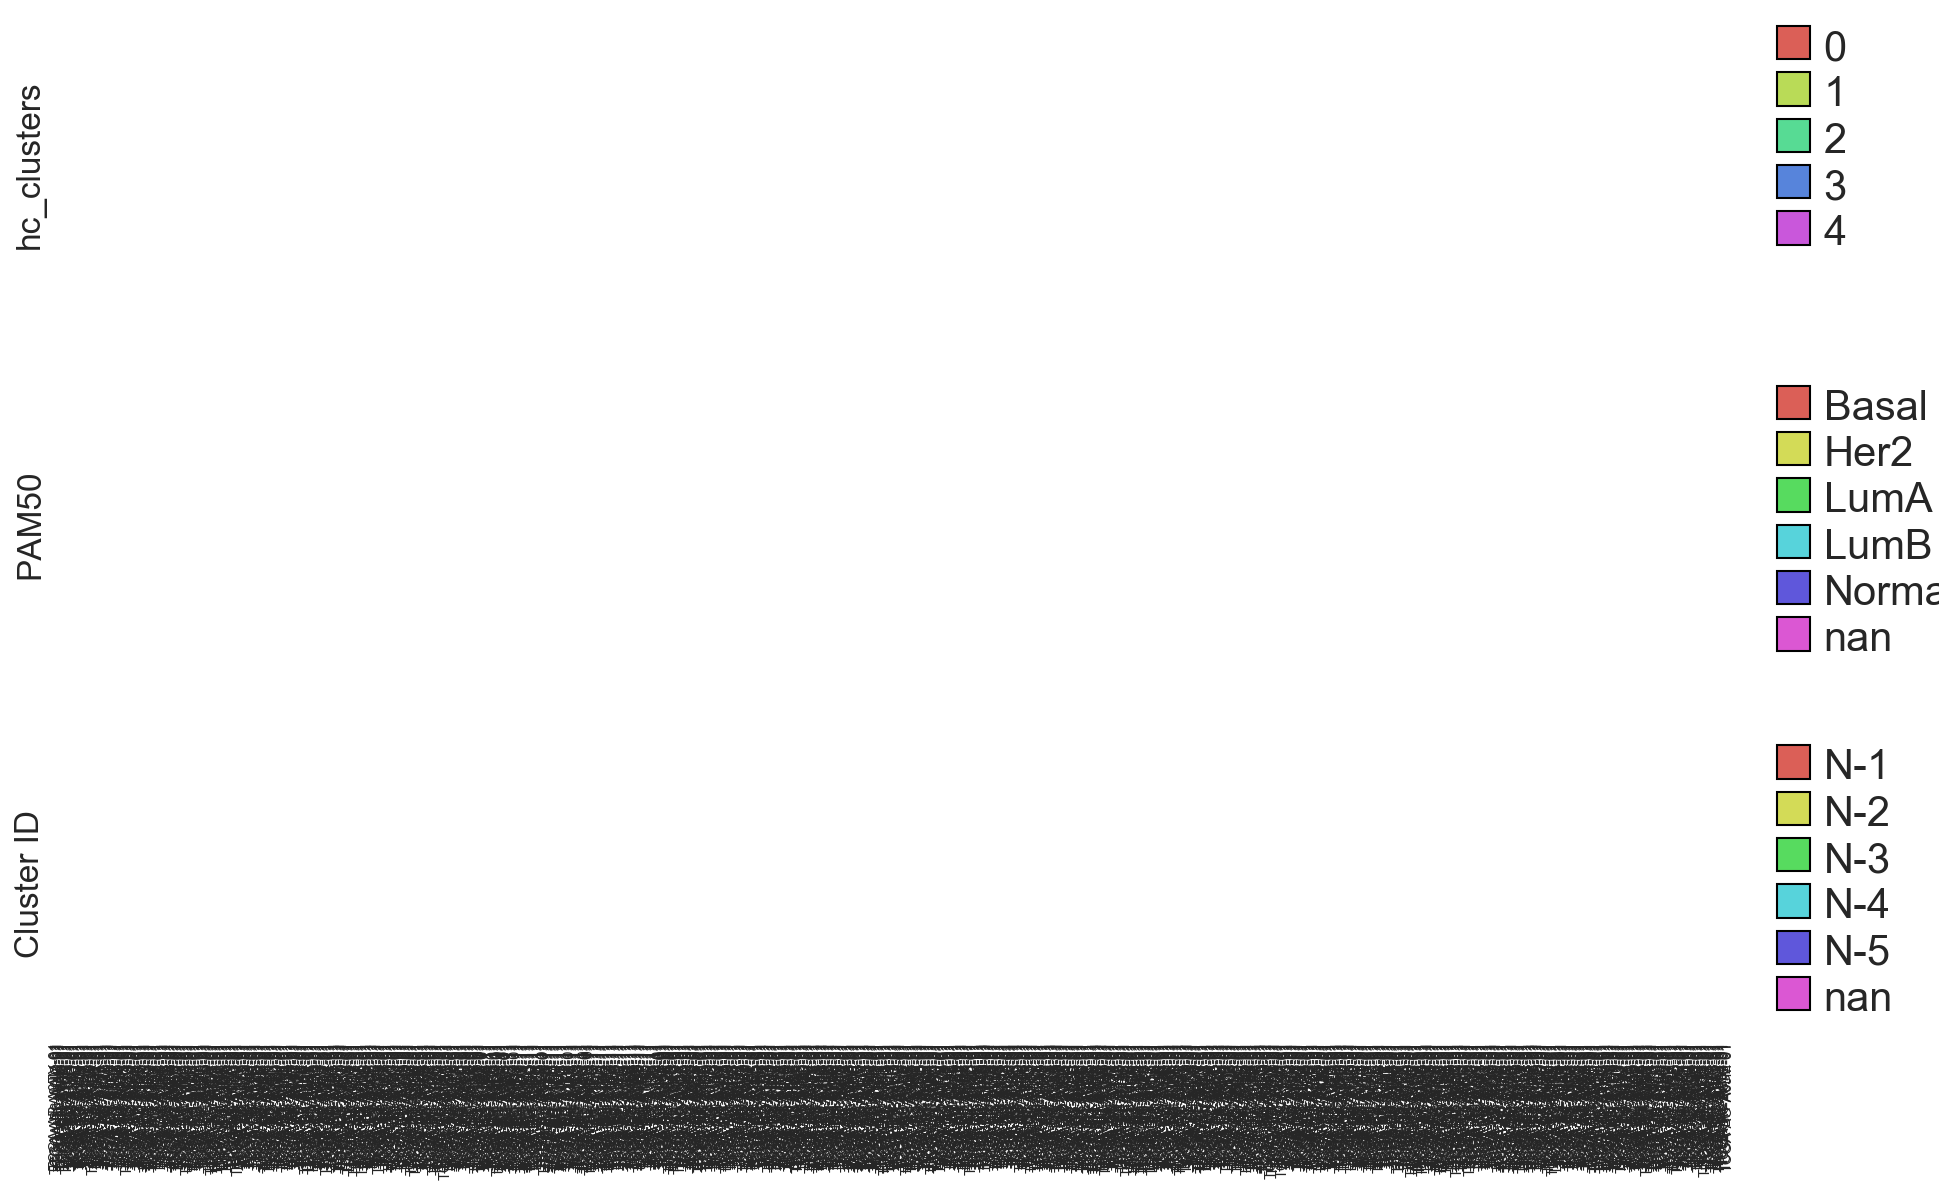

In [78]:
# plt.figure(dpi=300, figsize=(16,9))

f, axs = plt.subplots(3, 1, sharex=True, dpi=150, figsize=(16,9))
# f.set_figsize=(16,9)
# f.set_dpi=300

i = 0
for row in hc_df.index:
    a = catheat.heatmap( hc_df[ordered_samples].loc[[row],:], ax=axs[i], 
                        xticklabels=True, yticklabels=False, linewidths=.5)
    a.tick_params(labelsize=7)
    plt.setp(a.get_legend().get_texts(), fontsize='20') # for legend text
    a.set_ylabel(row,fontsize=16)
    for handle in a.get_legend().legendHandles:
        handle.set_height(16)
    i+=1

In [79]:
f.savefig('BRCA.pdf',dpi=600)

In [80]:
def plot_1D_1L_heatmap(axis, prev_ax, how_many, data, label):
    xmin, xmax = prev_ax.get_xlim()
    x = np.linspace(xmin, xmax, num=how_many)
    axis.scatter(x,np.zeros(how_many), color='r', marker='s')
    axis.set_xticklabels(list(data), rotation=90)
    axis.get_yaxis().set_ticks([])
    axis.set_ylabel(data.index[0])
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.spines['bottom'].set_visible(False)
    axis.spines['left'].set_visible(False)
    
    legend_elements = [Patch(facecolor='r', edgecolor='r', label=label)]
    # Shrink current axis by 20%
    box = axis.get_position()
    axis.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    # Put a legend to the right of the current axis
    axis.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    return a

Basal


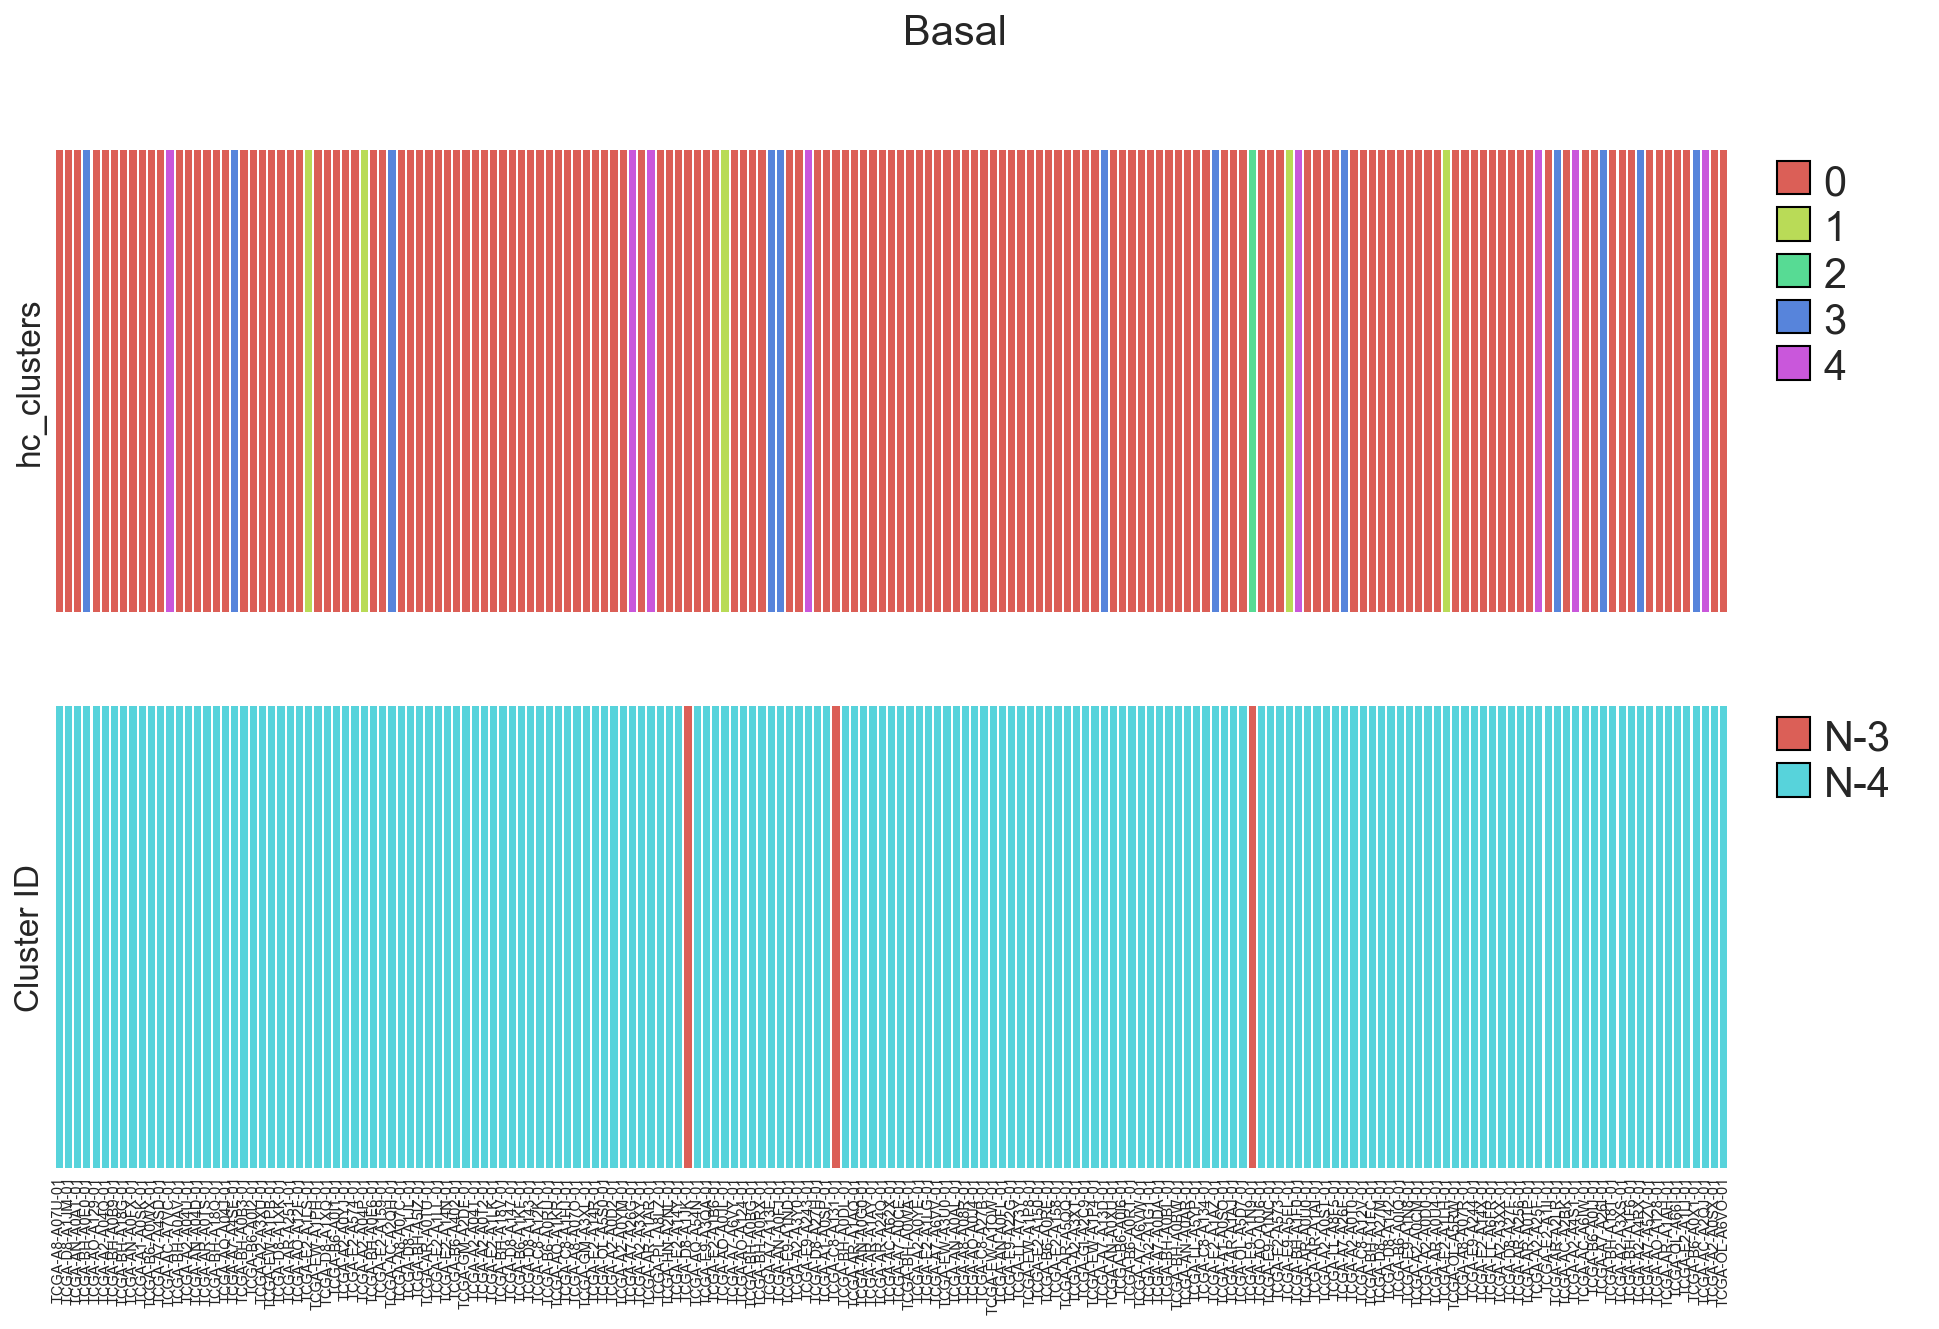

LumA


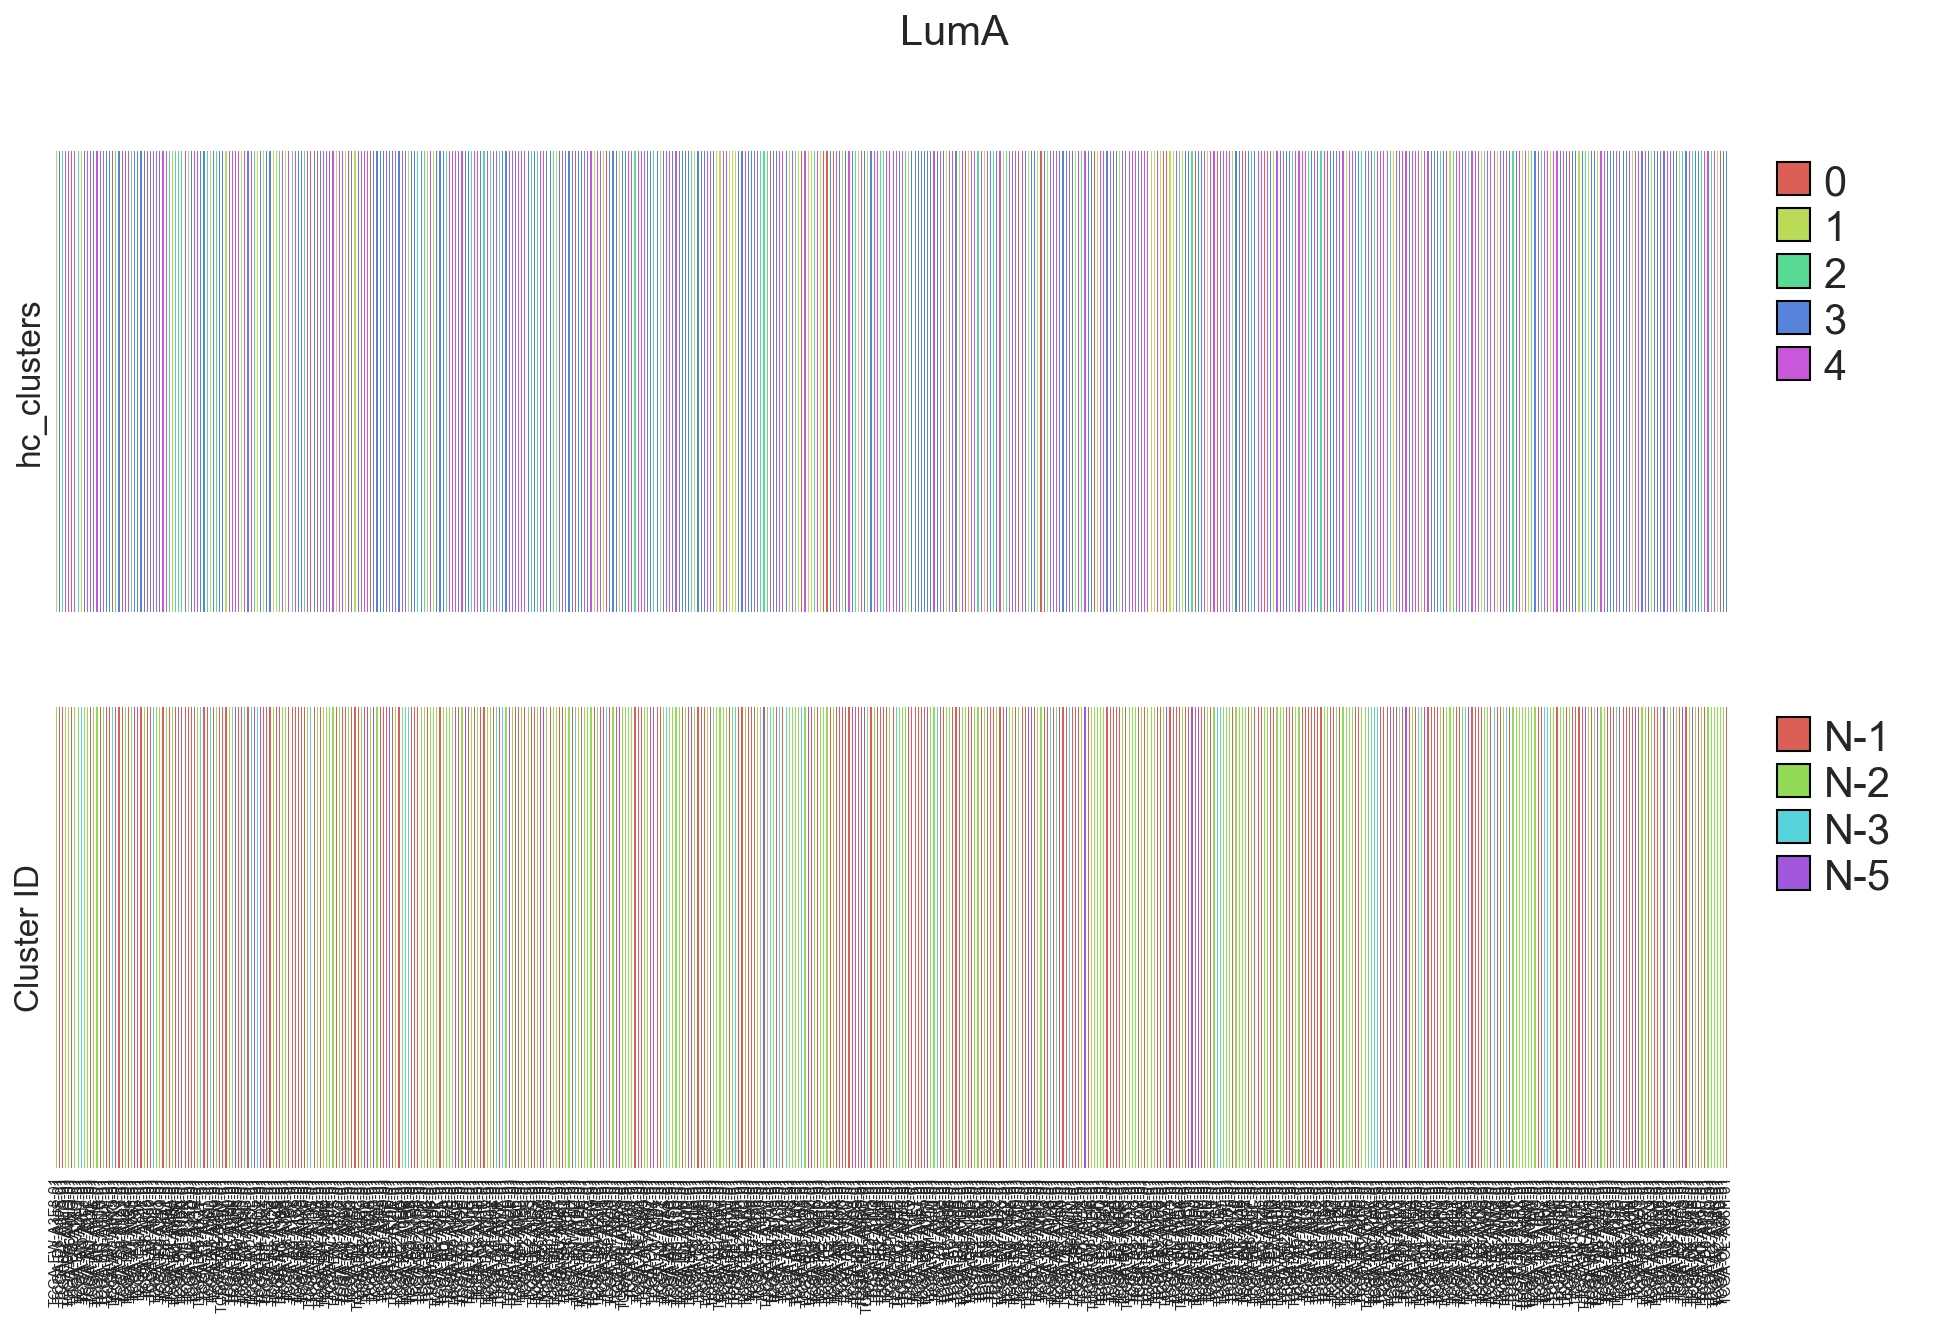

LumB


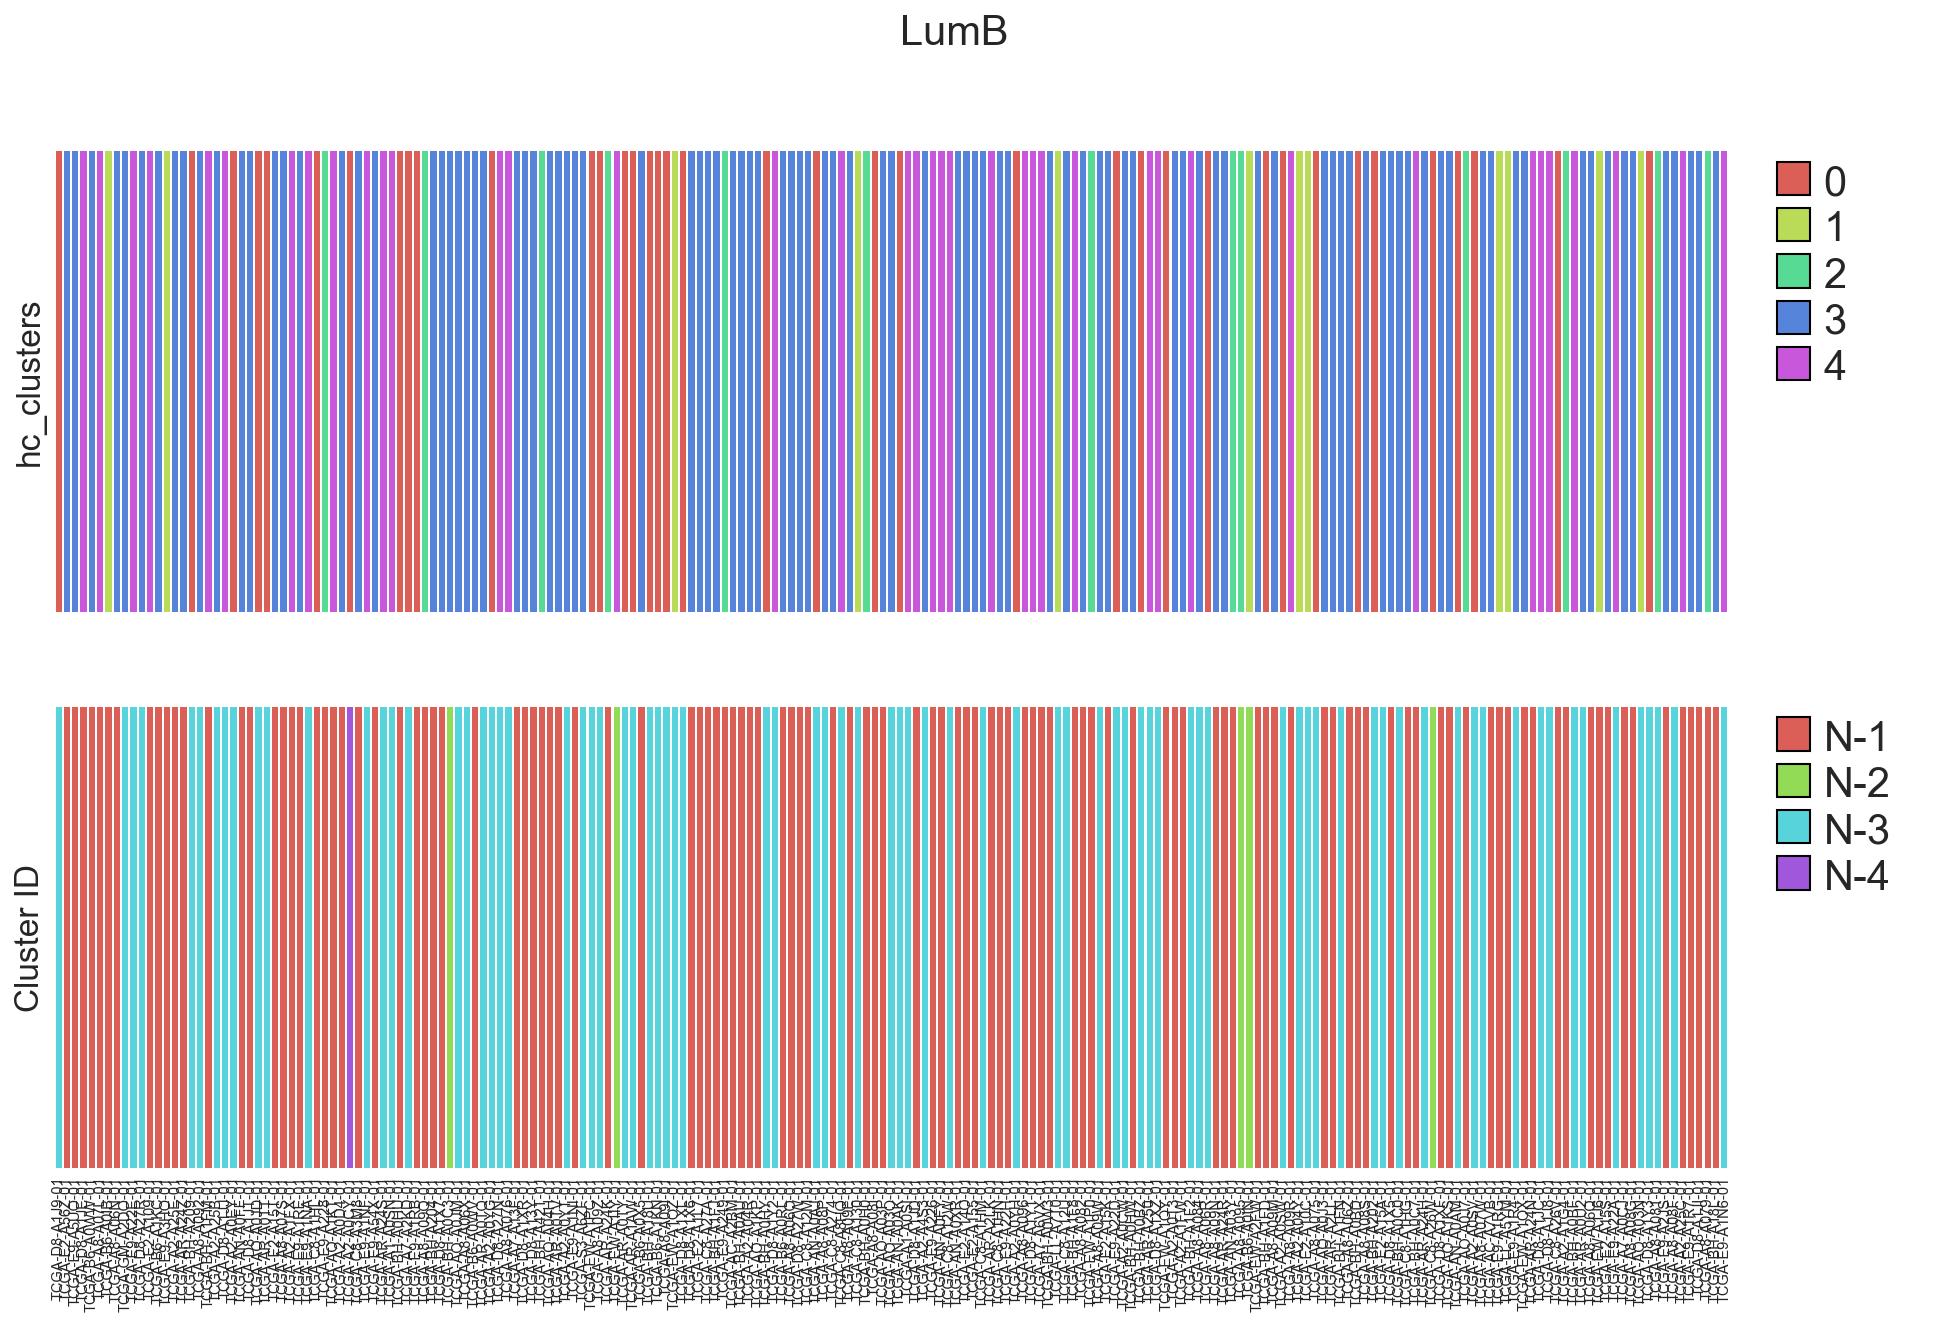

Normal


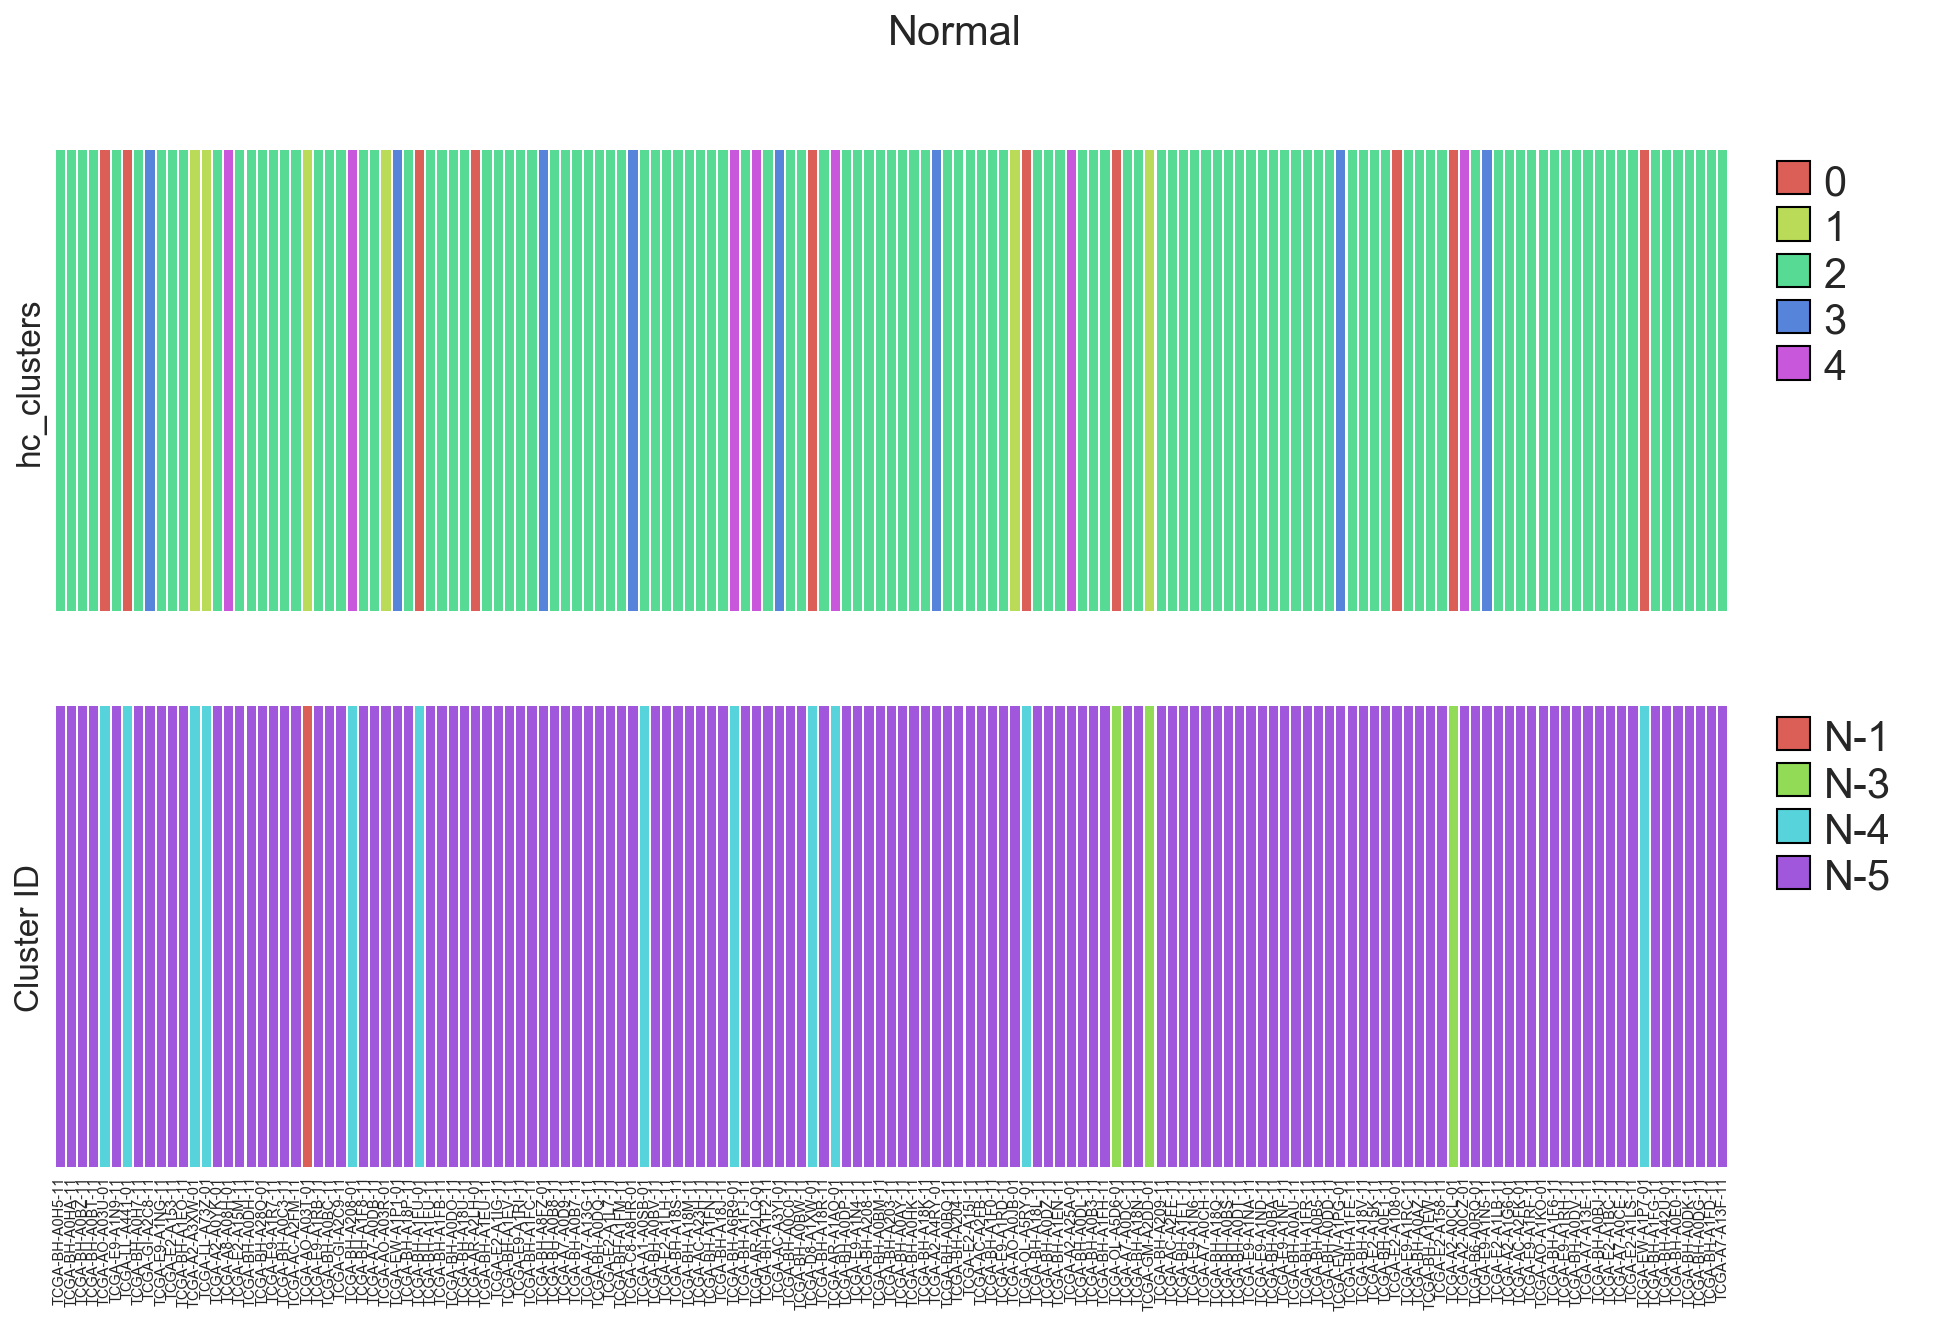

Her2


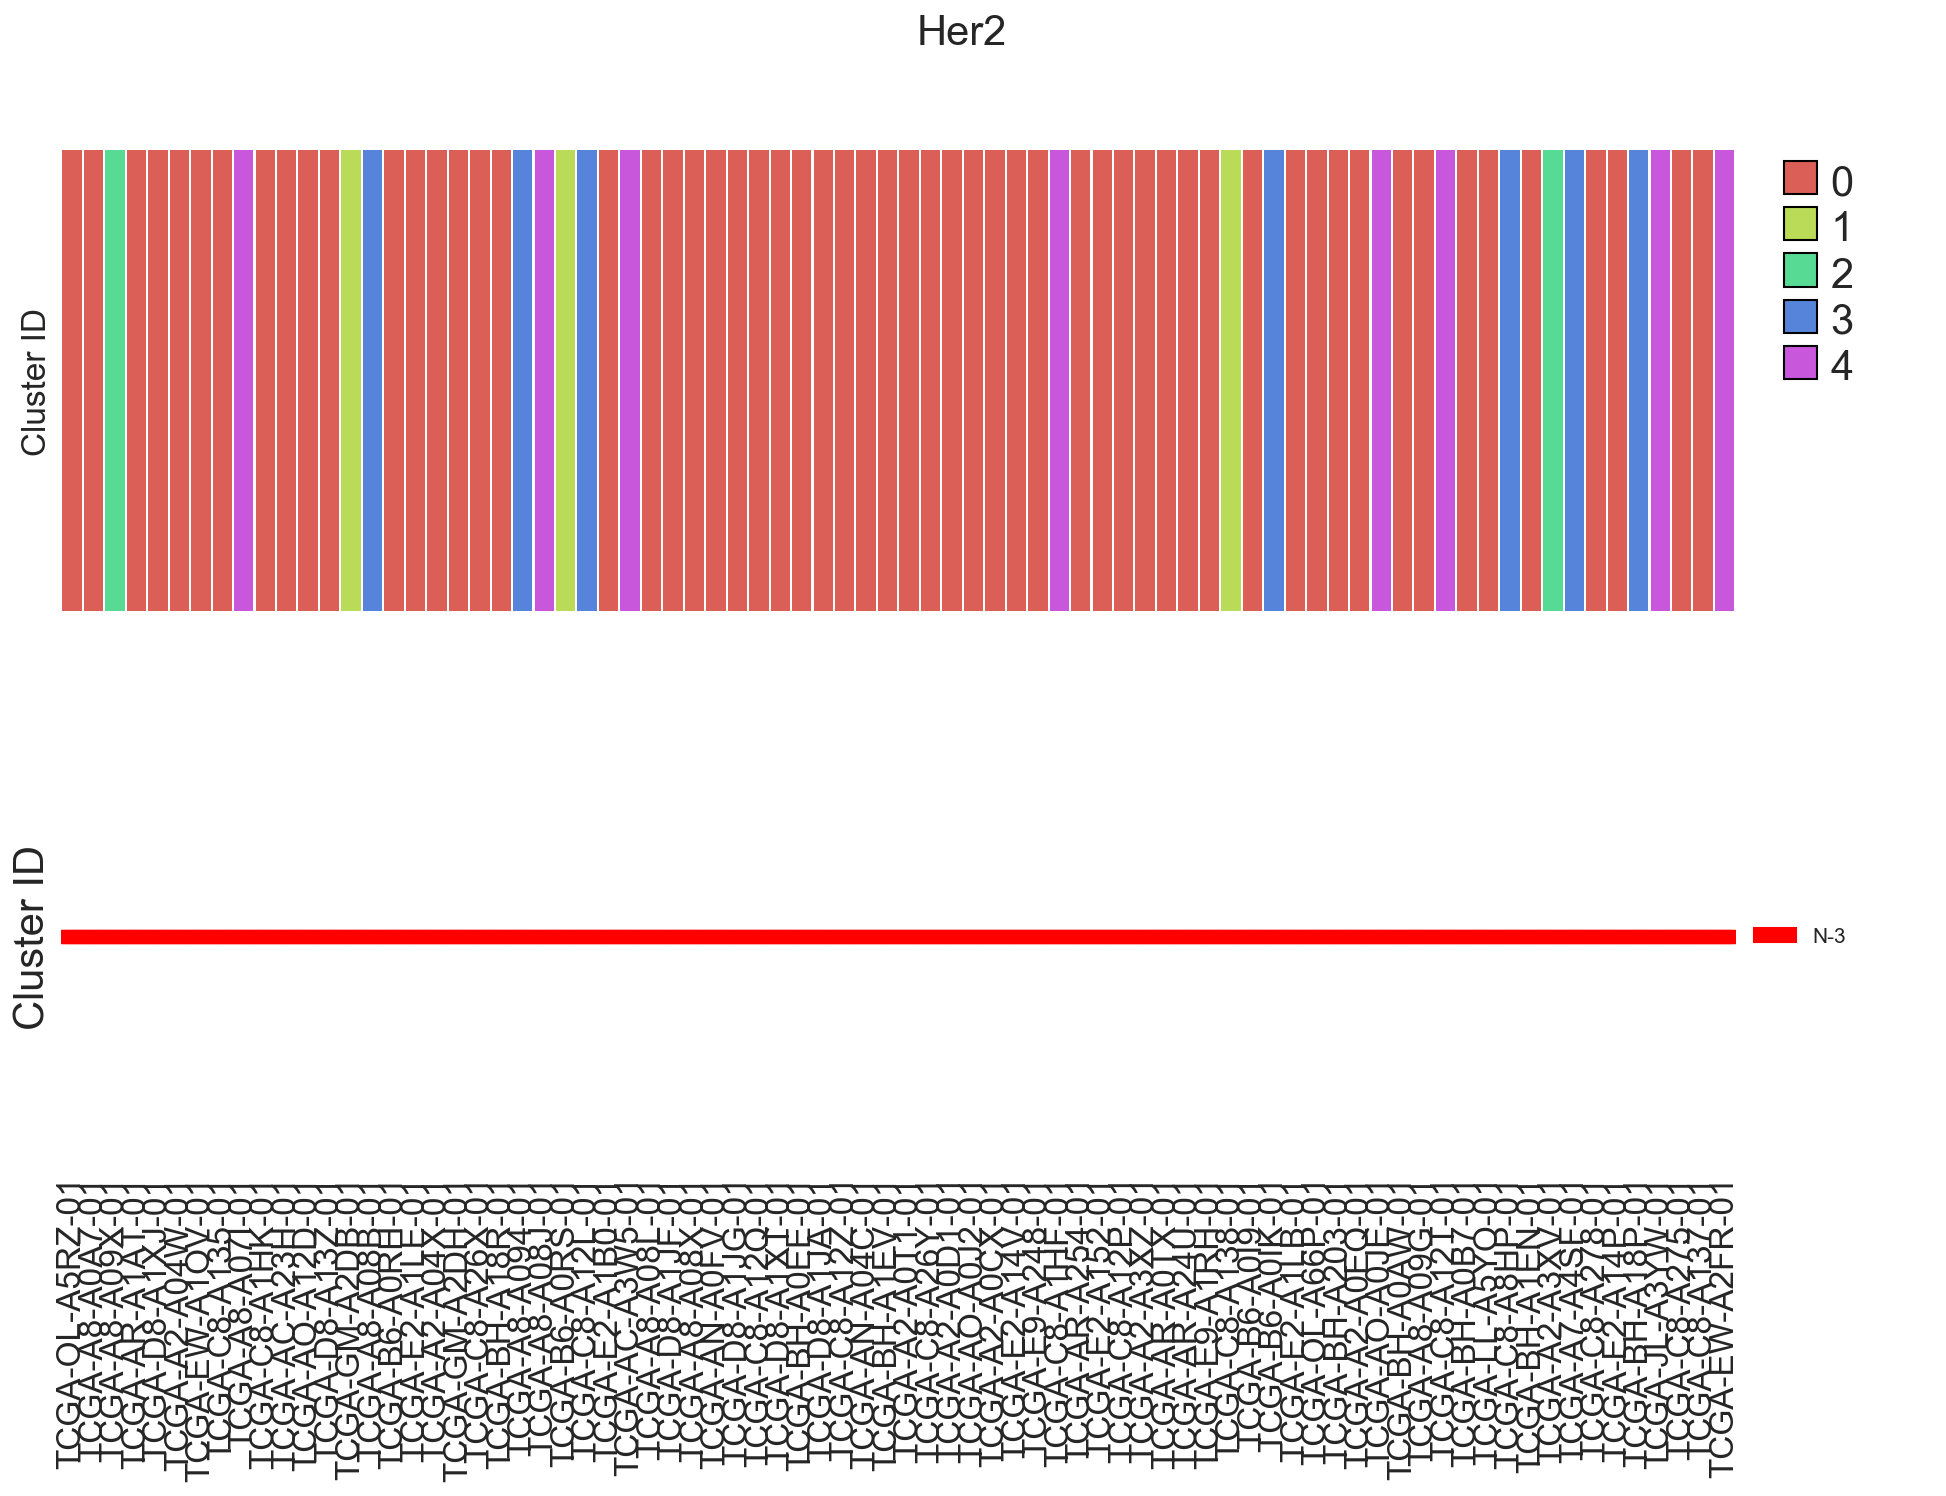

In [81]:
based_on = 'PAM50'
# based_on = 'hc_clusters'
for cat in [j for j in hc_df.loc[based_on].unique() if pd.notna(j)]:
# for cat in [j for j in hc_df.loc['PAM50',:].unique() if j!='Her2']:
# for cat in ['Basal']:
    print(cat)
    which_ones = [i for i in hc_df if hc_df.loc[based_on,i]==cat]
#     print(which_ones)
#     print(hc_df[which_ones])
    f, axs = plt.subplots(2, 1, sharex=True, dpi=150, figsize=(16,9))
    plt.suptitle(cat, fontsize=20)
    i =0
    for row in [i for i in hc_df.index if i!=based_on]:
        if len(pd.unique(hc_df[which_ones].loc[row]))==1:
            a = plot_1D_1L_heatmap(axis=axs[i], prev_ax=a, how_many=len(list(hc_df)),data=hc_df[which_ones].loc[[row],:],
                                  label= pd.unique(hc_df[which_ones].loc[row])[0])
        else:
            a = catheat.heatmap( hc_df[which_ones].loc[[row],:], ax=axs[i], xticklabels=True, 
                                yticklabels=False, linewidths=.5)  
        a.tick_params(labelsize=7)
        plt.setp(a.get_legend().get_texts(), fontsize='20') # for legend text
        a.set_ylabel(row,fontsize=16)
        for handle in a.get_legend().legendHandles:
            handle.set_height(16)
        i+=1
    plt.show()

----------------------------------------------------------------------
The PDF of this heatmap can be downloaded here:


----------------------------------------------------------------------
The CDF which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------
The ATR which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------
Done with Hierarchical Clustering!
1141
['TCGA-C8-A26W-01', 'TCGA-C8-A12Y-01', 'TCGA-A7-A56D-01', 'TCGA-B6-A0RH-01', 'TCGA-A2-A04X-01', 'TCGA-BH-A0EE-01', 'TCGA-E2-A572-01', 'TCGA-C8-A133-01', 'TCGA-OL-A66H-01', 'TCGA-WT-AB41-01', 'TCGA-LL-A5YN-01', 'TCGA-D8-A1XL-01', 'TCGA-E9-A5FK-01', 'TCGA-BH-A0B6-01', 'TCGA-EW-A1OV-01', 'TCGA-GM-A2DF-01', 'TCGA-C8-A26X-01', 'TCGA-BH-A209-01', 'TCGA-B6-A0IJ-01', 'TCGA-A8-A07U-01', 'TCGA-A2-A04Q-01', 'TCGA-C8-A12V-01', 'TCGA-E9-A248-01', 'TCGA-EW-A1IZ-01', 'TCGA-AR-A0TT-01', 'TCGA-AR-A1AW-01', 'TCGA-OL-A5RY-01', 'TCGA-LL-A5YO-01', 'TCGA-OL-A66P-01', 'TCGA-A8-A08X-01', 'TCGA-LL-A7SZ-01', 'TCGA-S3-AA15-01', 'TCGA-AC-A8OQ-01', 'TCGA-AR-A1AQ-01', 'TCGA-BH-A1FC-01', 'TCGA-S3-AA17-01', 'TCGA-BH-A0C0-01', 'TCGA-EW-A3E8-01', 'TCGA-A2-A0CR-01', 'TCGA-BH-A0W7-01', 'TCGA-BH-A2L8-01', 'TCGA-LD-A9QF-01', 'TCGA-C8-A1HF-01', 'TCGA-LL-A441-01', 'TCGA-B6-A3ZX-01', 'TCGA-EW-A3U0-01', 'TCGA-EW-A1P7-

Basal


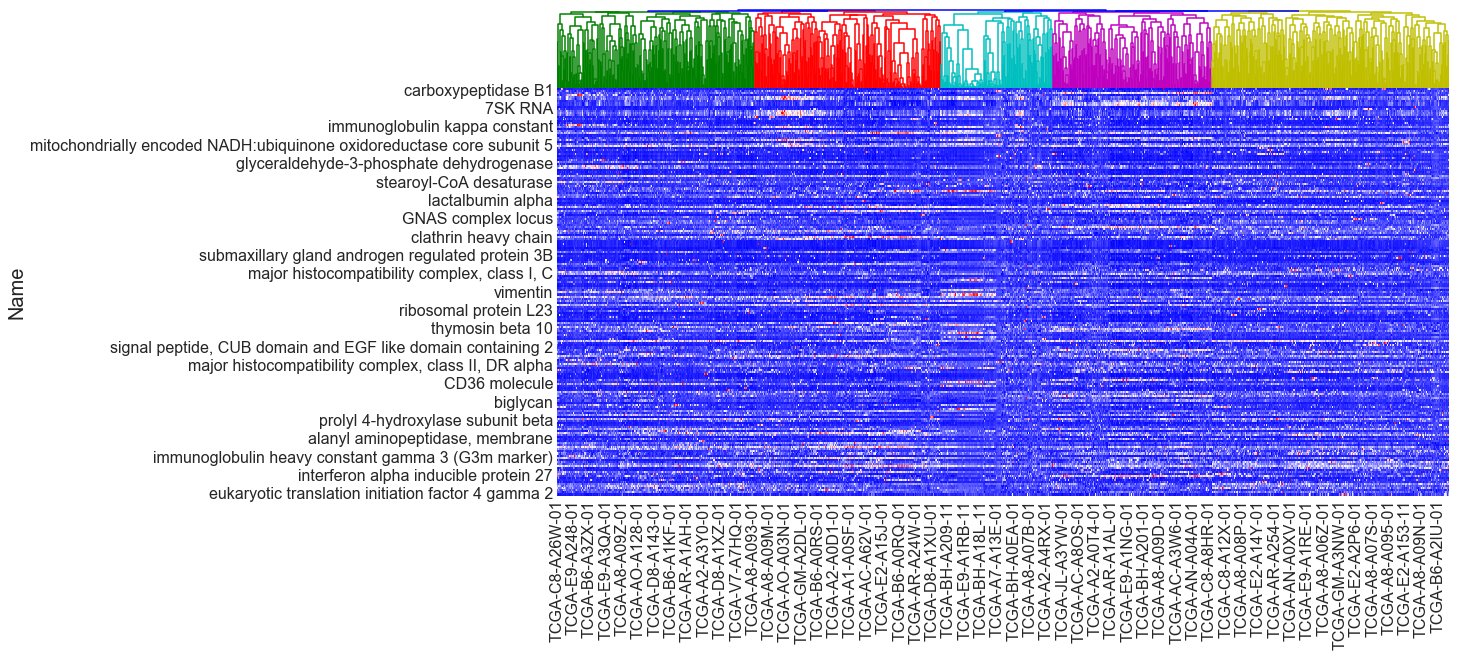

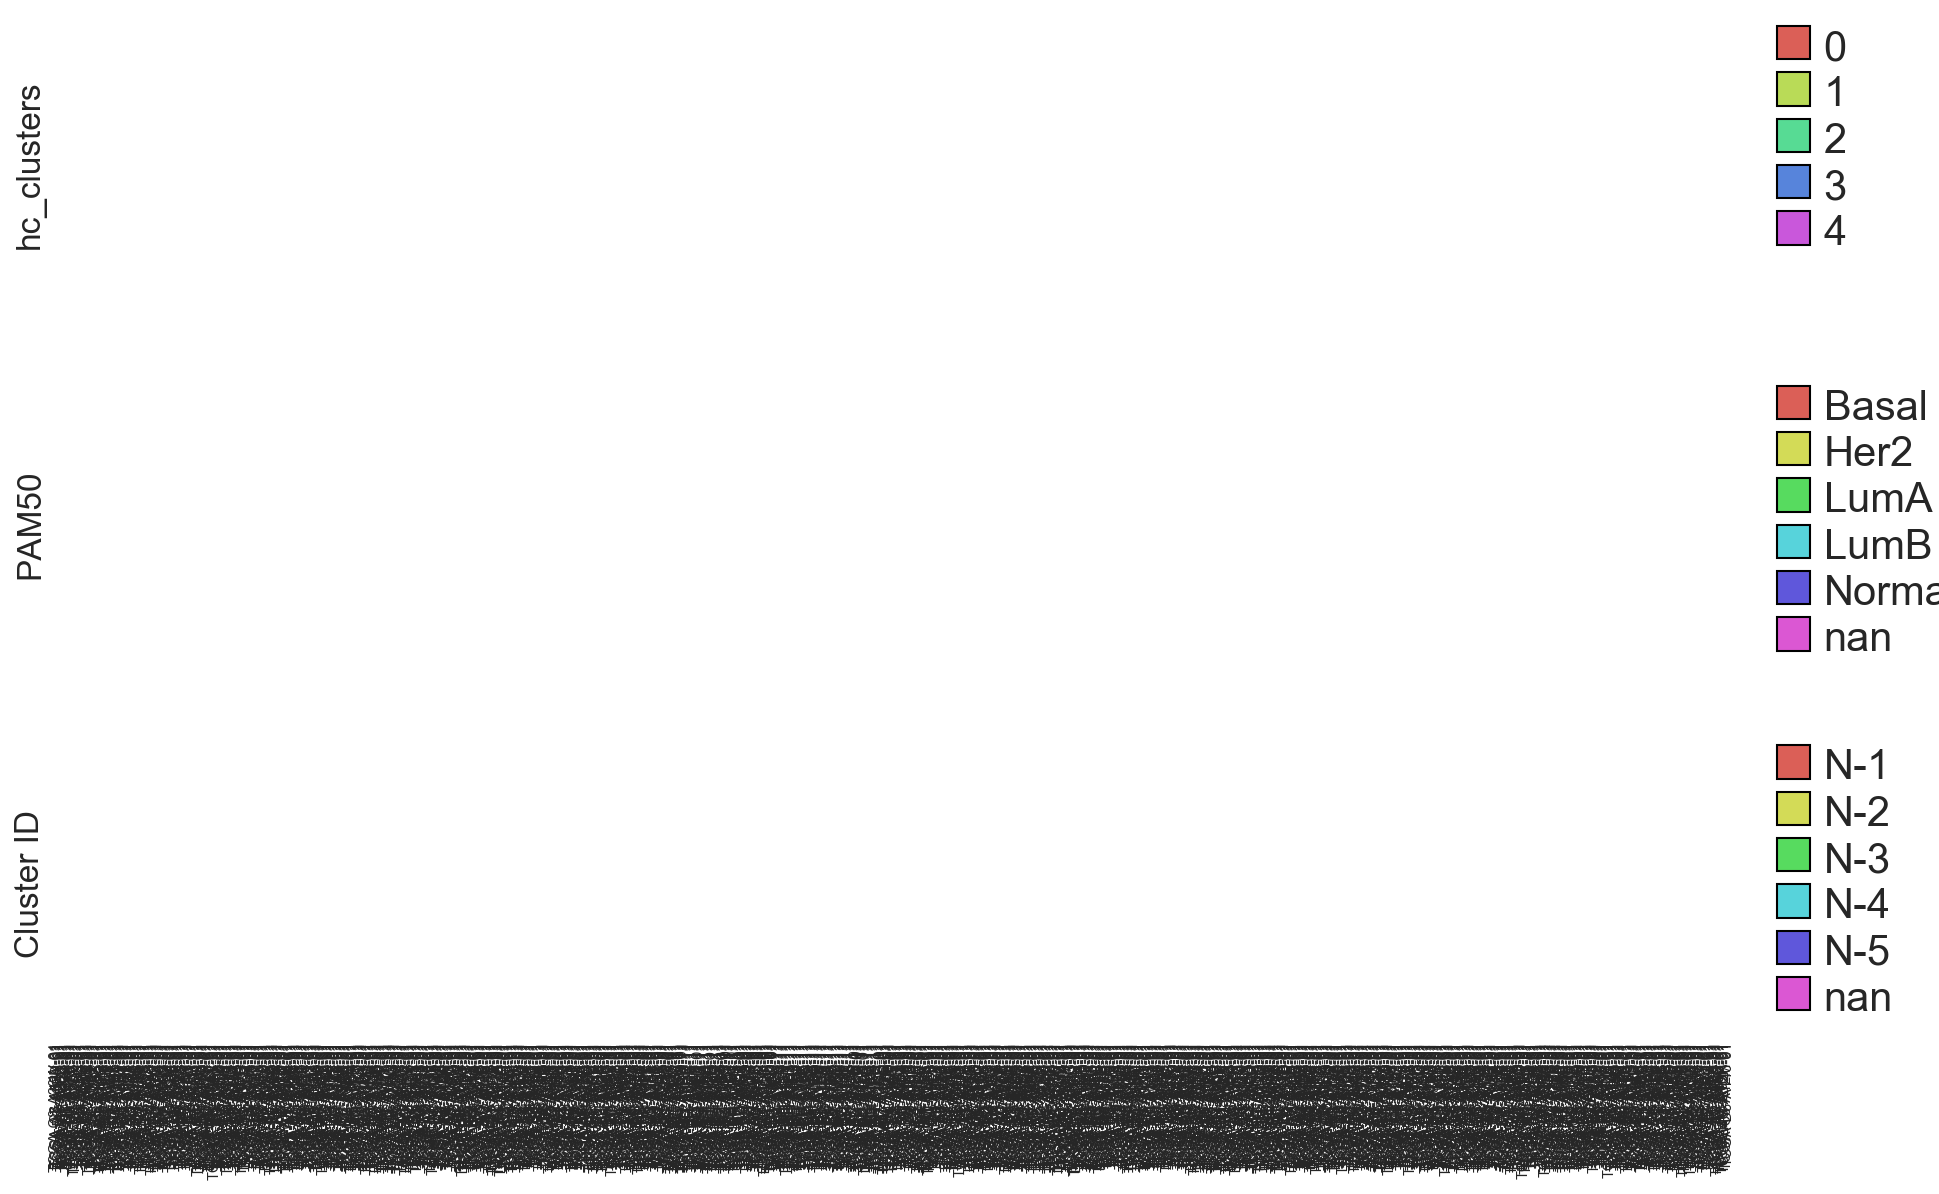

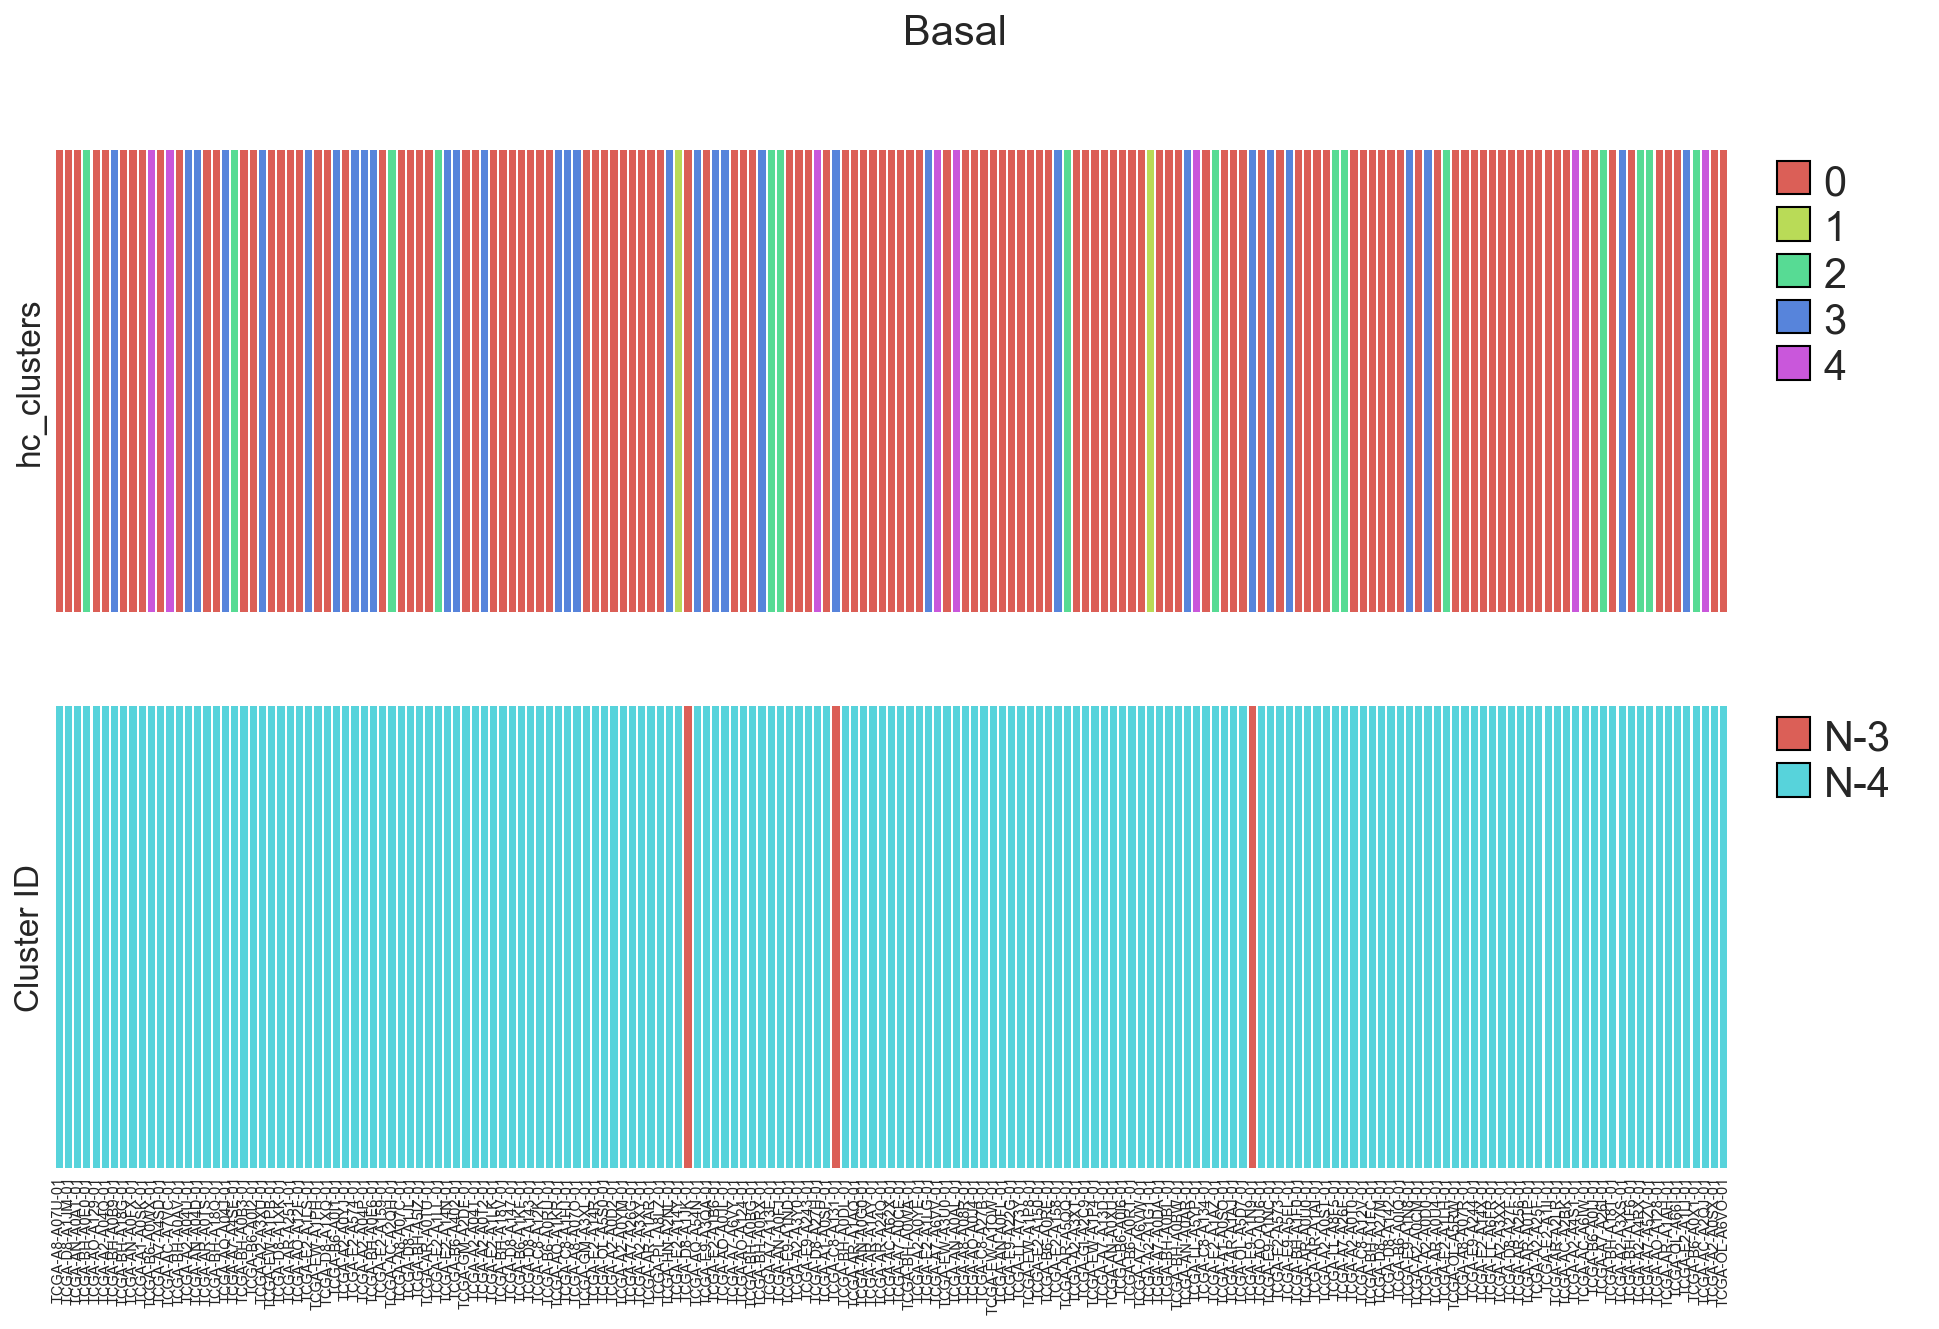

LumA


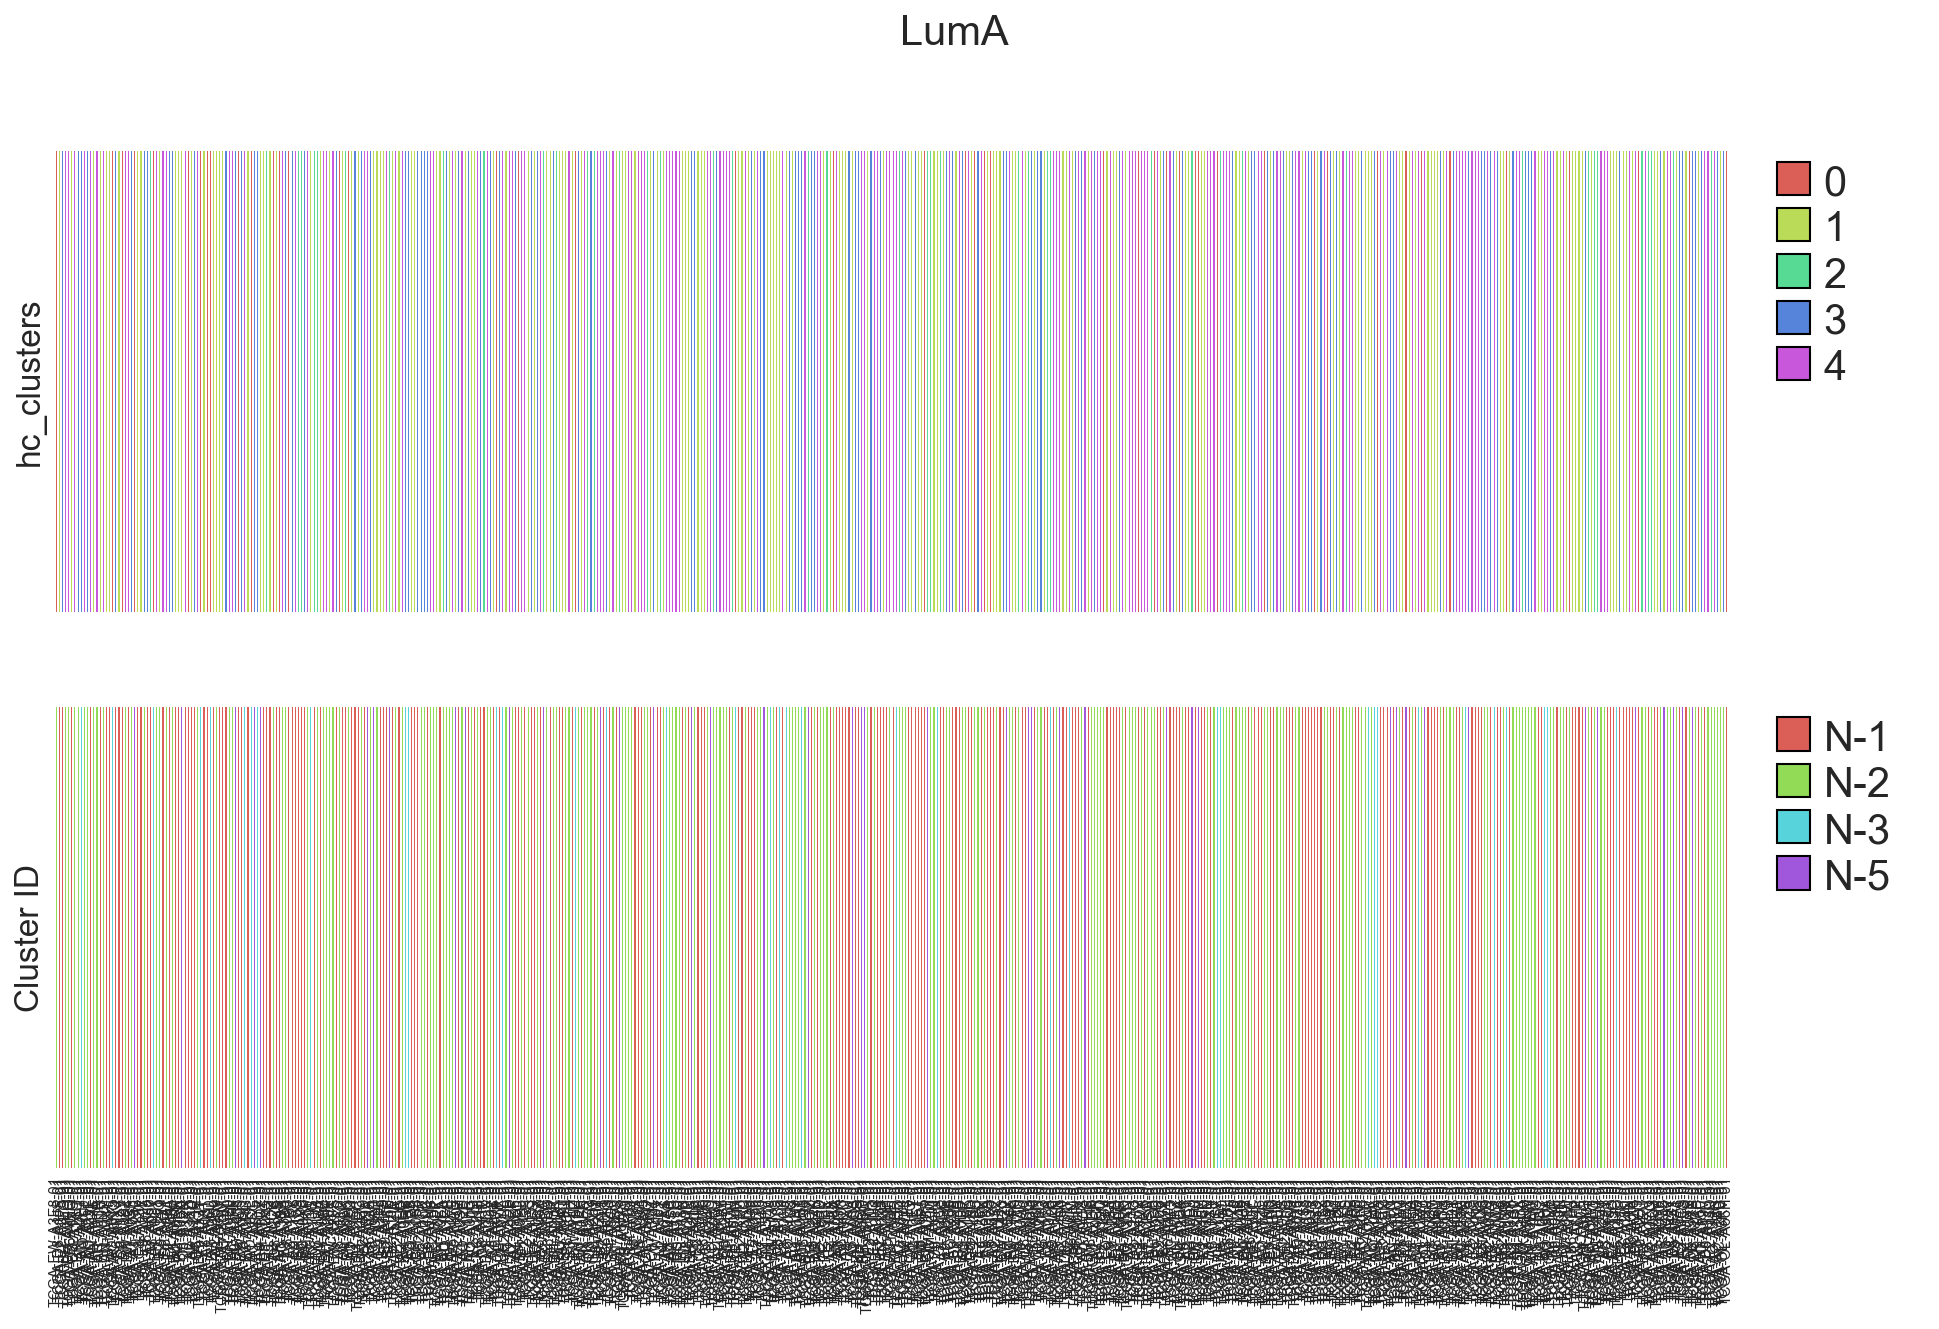

LumB


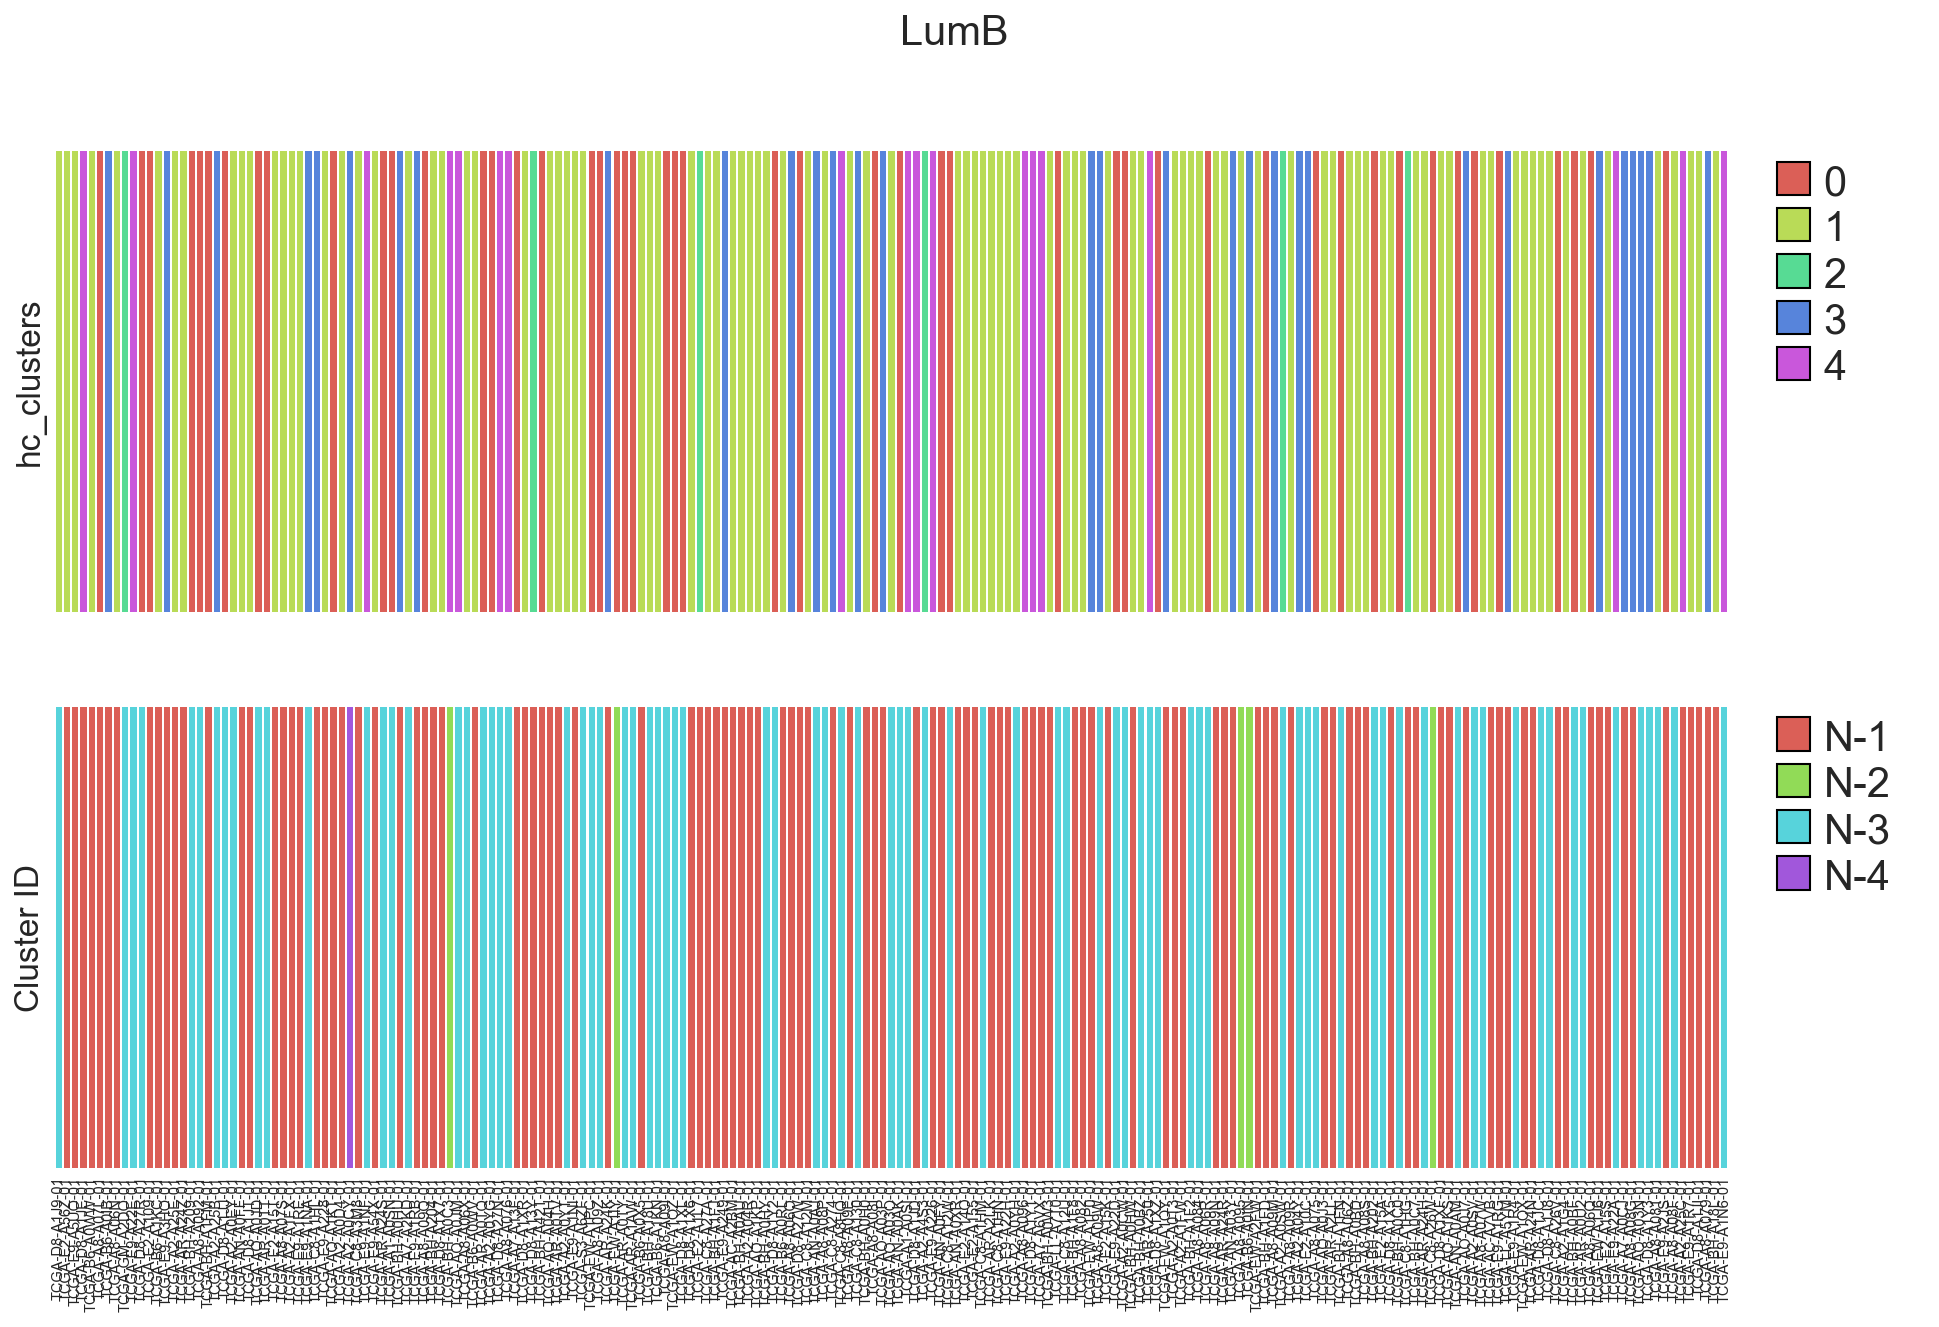

Normal


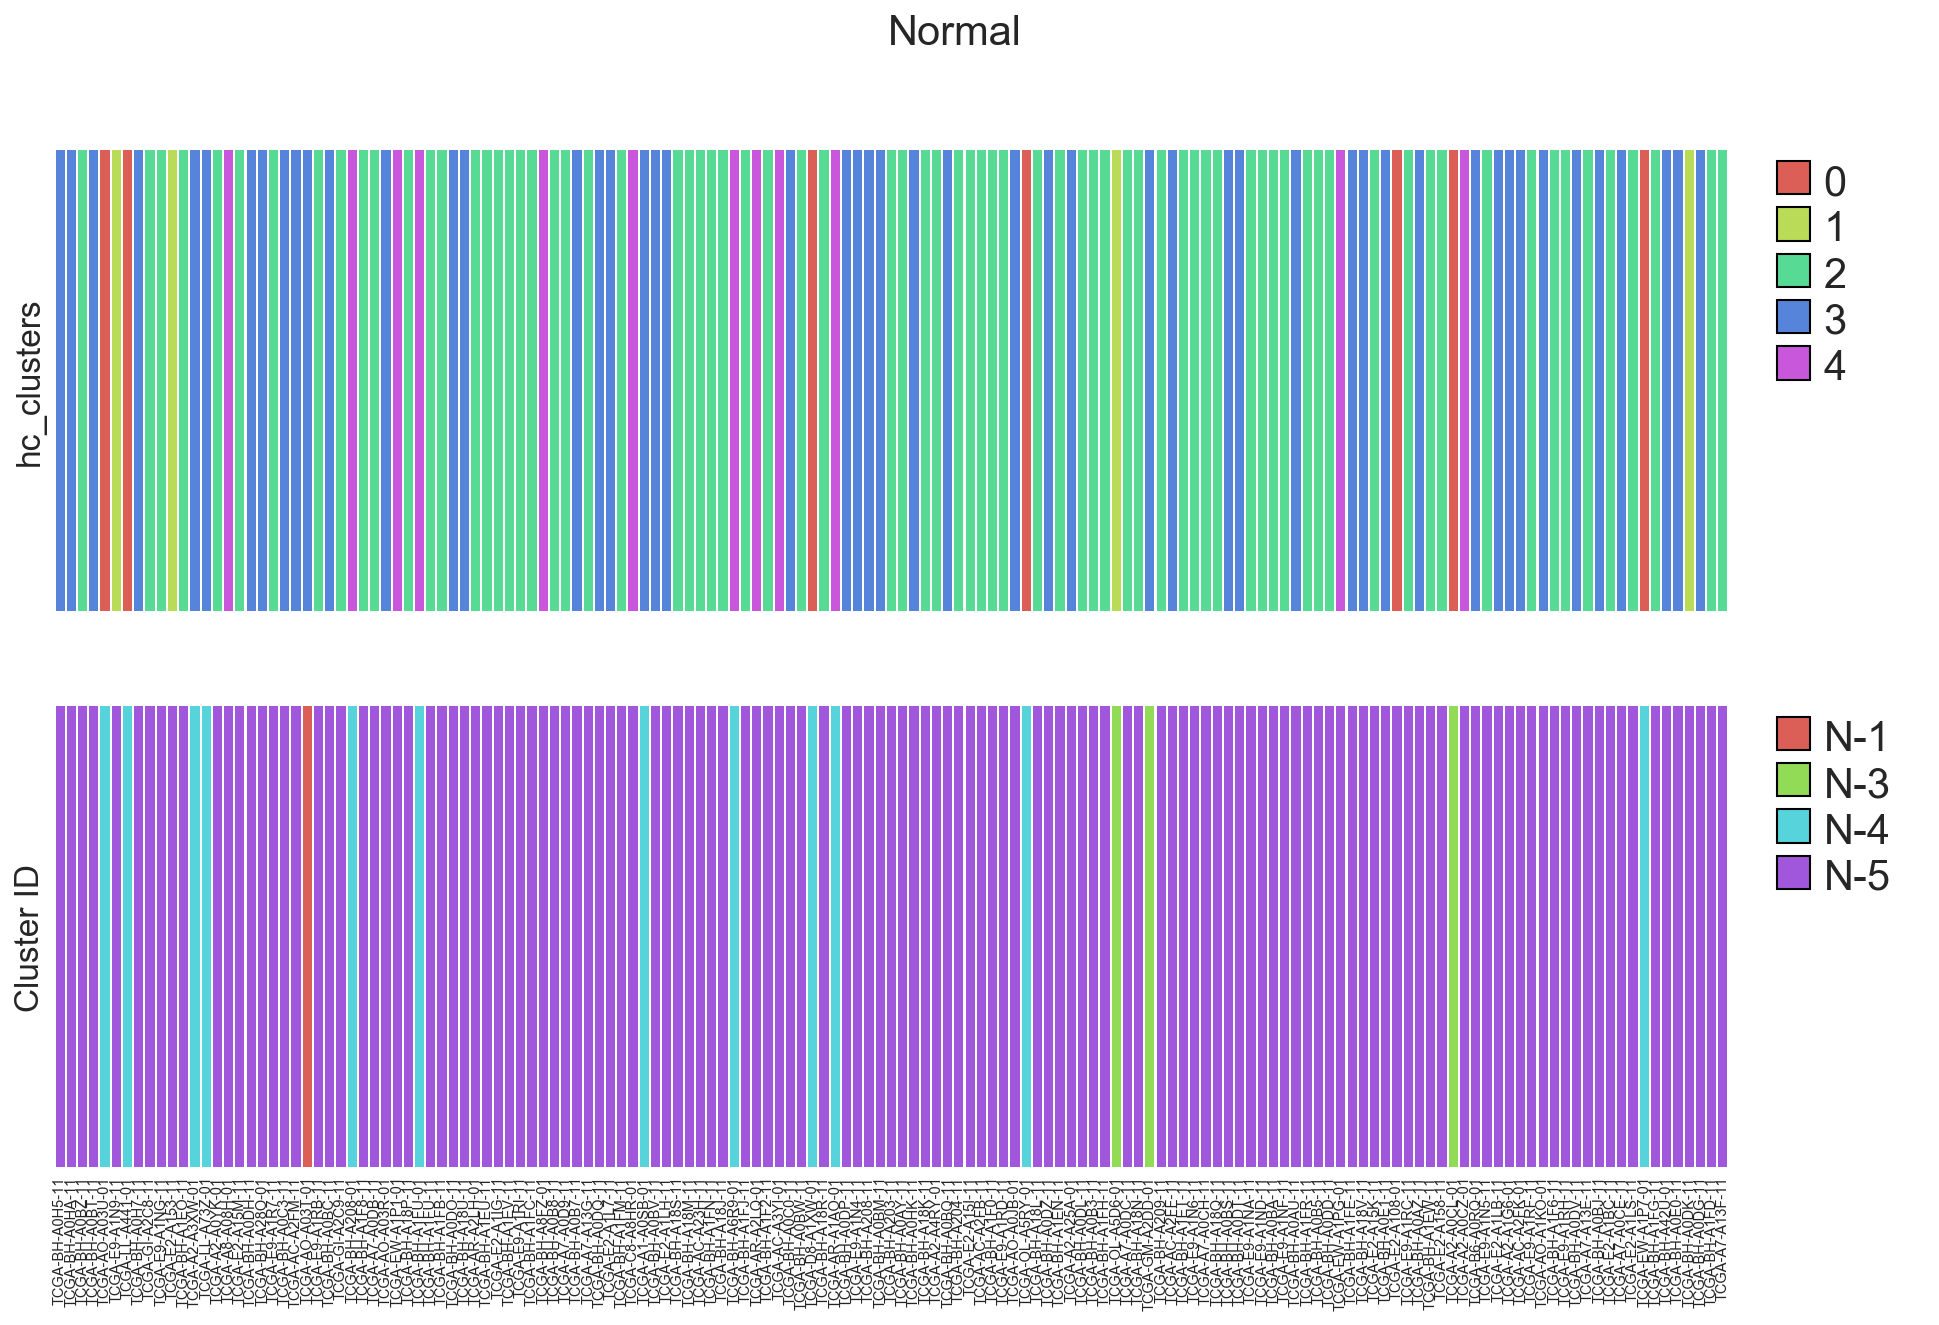

Her2


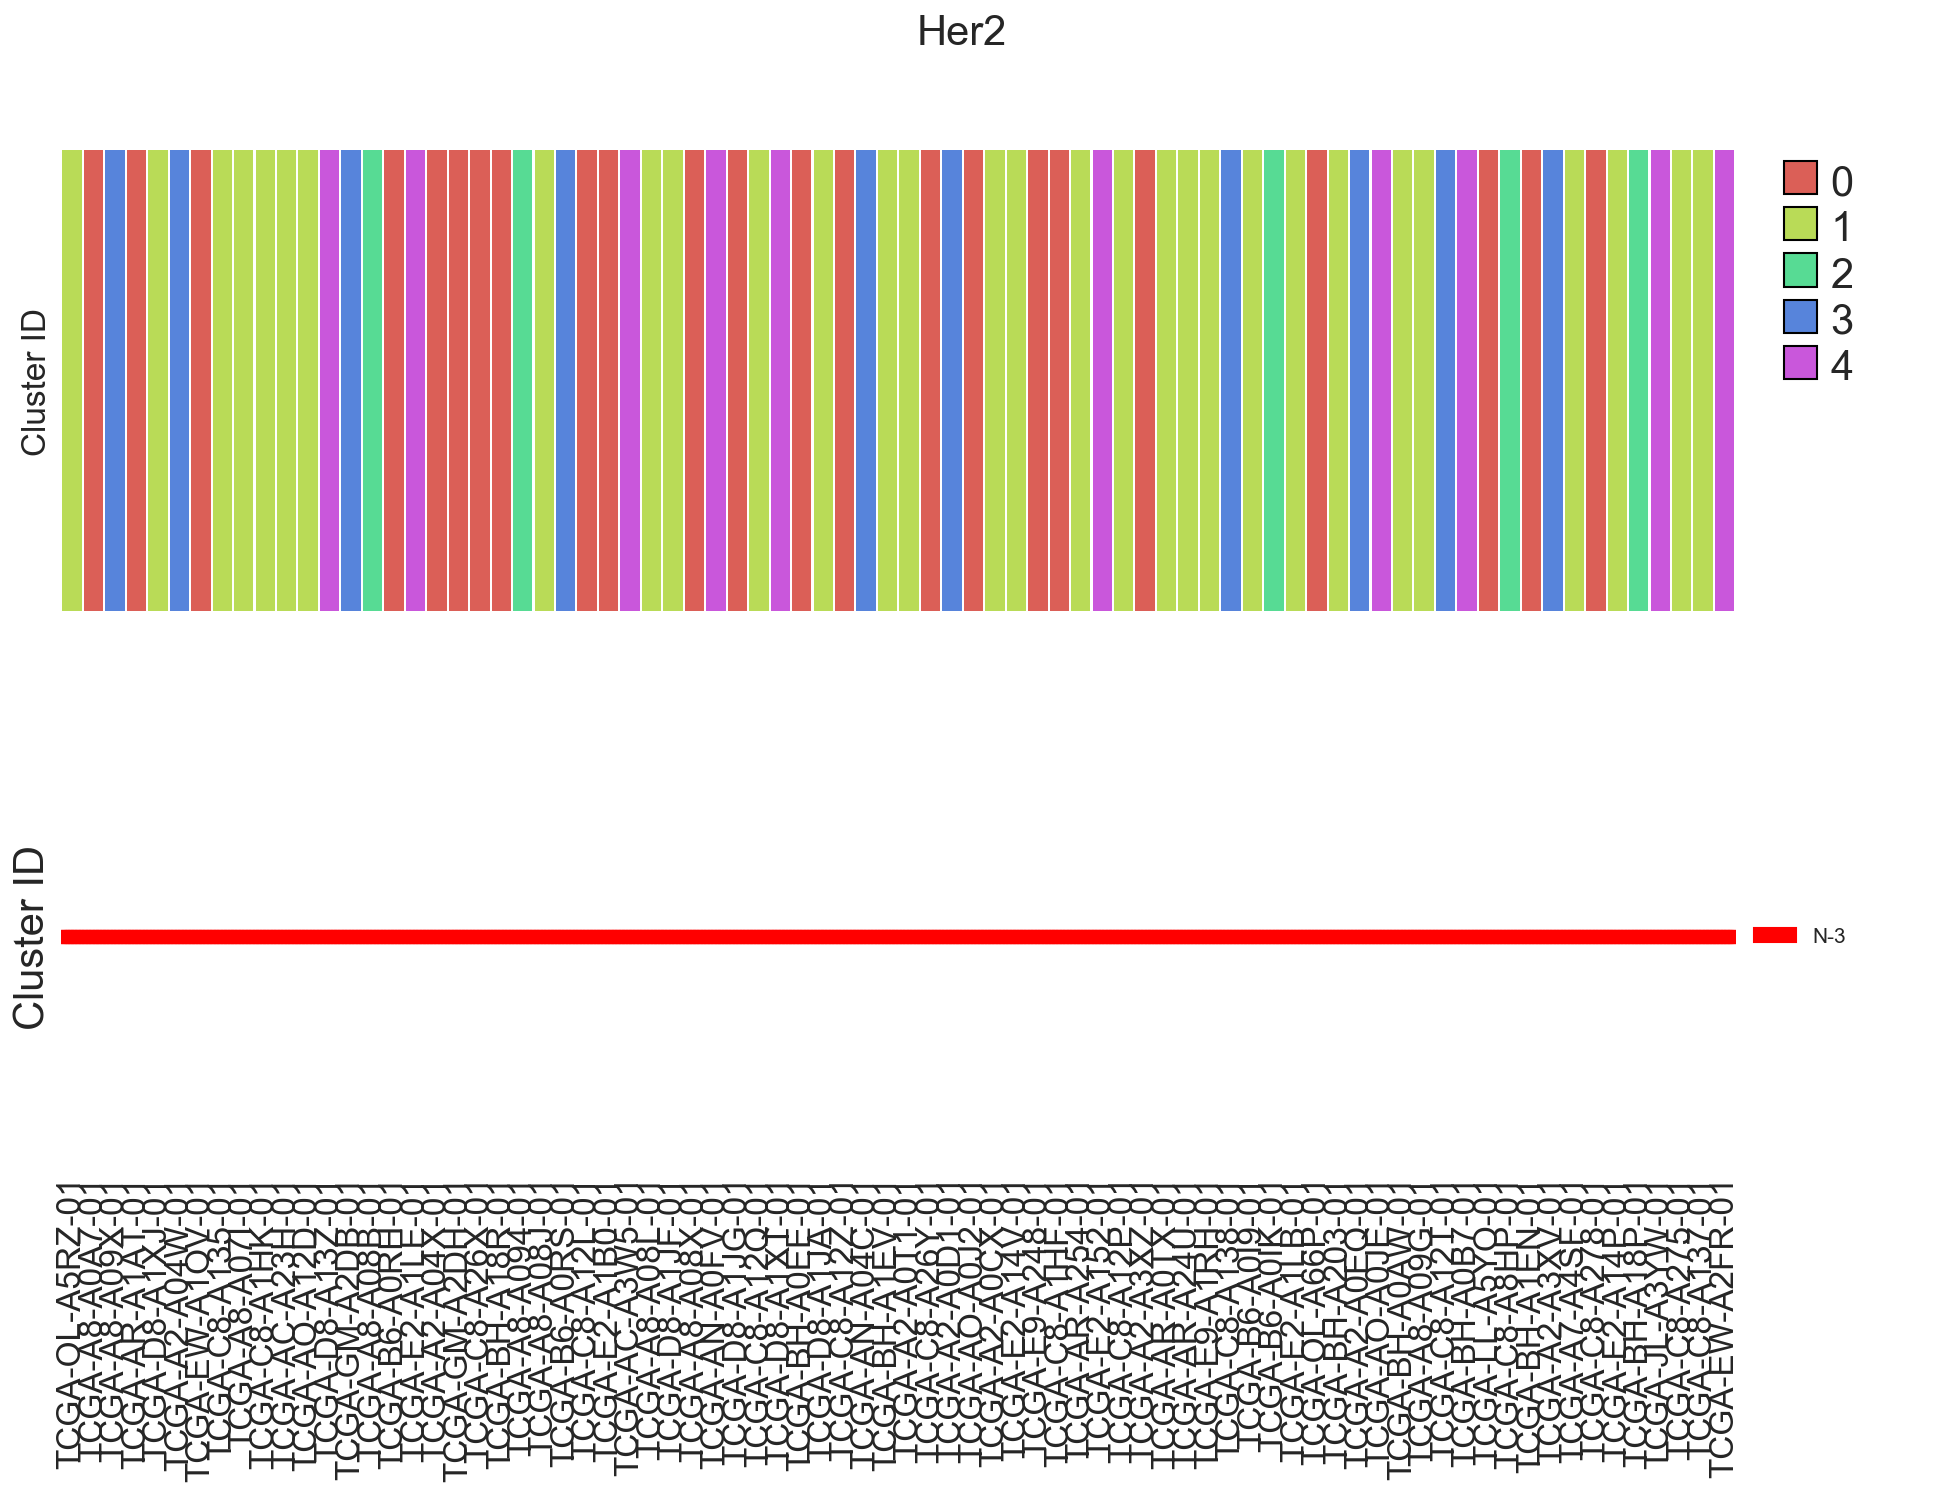

In [ ]:
base_name = 'HC_output_pearson'
model = cusca.HierarchicalClustering(pwd = '.',
                              gct_name = rna,
                              col_distance_metric = 'pearson',
                              row_distance_metric = 'No_row_clustering',
                              clustering_method = 'complete',#'average',
                              output_base_name = base_name,
                              row_normalization = True,
                              col_normalization = True,
                              row_centering = 'Mean',
                              col_centering = 'Mean',
                              output_distances=False,
                              custom_plot = 'Samples',
                              clusters_to_highlight = 5,
                              show = True)
print("Done with Hierarchical Clustering!")

f = open(base_name+'.cls')
f.readline()
f.readline()
hc_clusters = f.readline().strip('\n').split(' ')
f.close()

hc_df = pd.DataFrame(columns=list(rna))
hc_df.loc['hc_clusters',:] = hc_clusters
# hc_df.apply(lambda x: ['hc-'+i for i in x], axis=1)
hc_df


# netanely[['Cluster ID','PAM50']].transpose()


in_common = list(set(netanely.index) & set(hc_df))
print(len(in_common))
netanely_ids = netanely[['Cluster ID','PAM50']].transpose()[in_common]
netanely_ids

hc_df.loc['PAM50'] = netanely_ids.loc['PAM50']
hc_df.loc['Cluster ID'] = netanely_ids.loc['Cluster ID'].apply(lambda x: 'N-'+str(x))

hc_df

# Read CDT file for ordering of columns
f = open(base_name+'.cdt')
ordered_samples = [i for i in f.readline().strip('\n').split('\t') if ((i!='ID') and (i!='Name') and (i!='GWEIGHT') and (i!='GID') )]
ordered_samples = [i for i in reversed(ordered_samples)]
f.close()
# print(ordered_samples)

print(len(list(hc_df[ordered_samples])))
hc_df[ordered_samples]

# plt.figure(dpi=300, figsize=(16,9))

f, axs = plt.subplots(3, 1, sharex=True, dpi=150, figsize=(16,9))
# f.set_figsize=(16,9)
# f.set_dpi=300

i = 0
for row in hc_df.index:
    a = catheat.heatmap( hc_df[ordered_samples].loc[[row],:], ax=axs[i], 
                        xticklabels=True, yticklabels=False, linewidths=.5)
    a.tick_params(labelsize=7)
    plt.setp(a.get_legend().get_texts(), fontsize='20') # for legend text
    a.set_ylabel(row,fontsize=16)
    for handle in a.get_legend().legendHandles:
        handle.set_height(16)
    i+=1

f.savefig('BRCA.pdf',dpi=600)

def plot_1D_1L_heatmap(axis, prev_ax, how_many, data, label):
    xmin, xmax = prev_ax.get_xlim()
    x = np.linspace(xmin, xmax, num=how_many)
    axis.scatter(x,np.zeros(how_many), color='r', marker='s')
    axis.set_xticklabels(list(data), rotation=90)
    axis.get_yaxis().set_ticks([])
    axis.set_ylabel(data.index[0])
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.spines['bottom'].set_visible(False)
    axis.spines['left'].set_visible(False)
    
    legend_elements = [Patch(facecolor='r', edgecolor='r', label=label)]
    # Shrink current axis by 20%
    box = axis.get_position()
    axis.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    # Put a legend to the right of the current axis
    axis.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    return a

based_on = 'PAM50'
# based_on = 'hc_clusters'
for cat in [j for j in hc_df.loc[based_on].unique() if pd.notna(j)]:
# for cat in [j for j in hc_df.loc['PAM50',:].unique() if j!='Her2']:
# for cat in ['Basal']:
    print(cat)
    which_ones = [i for i in hc_df if hc_df.loc[based_on,i]==cat]
#     print(which_ones)
#     print(hc_df[which_ones])
    f, axs = plt.subplots(2, 1, sharex=True, dpi=150, figsize=(16,9))
    plt.suptitle(cat, fontsize=20)
    i =0
    for row in [i for i in hc_df.index if i!=based_on]:
        if len(pd.unique(hc_df[which_ones].loc[row]))==1:
            a = plot_1D_1L_heatmap(axis=axs[i], prev_ax=a, how_many=len(list(hc_df)),data=hc_df[which_ones].loc[[row],:],
                                  label= pd.unique(hc_df[which_ones].loc[row])[0])
        else:
            a = catheat.heatmap( hc_df[which_ones].loc[[row],:], ax=axs[i], xticklabels=True, 
                                yticklabels=False, linewidths=.5)  
        a.tick_params(labelsize=7)
        plt.setp(a.get_legend().get_texts(), fontsize='20') # for legend text
        a.set_ylabel(row,fontsize=16)
        for handle in a.get_legend().legendHandles:
            handle.set_height(16)
        i+=1
    plt.show()

# Trying RSEM normalized data 

In [ ]:
'BRCA.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_isoforms_normalized__data.data.txt'

In [2]:
%matplotlib inline
import pandas as pd
import cuzcatlan as cusca
import seaborn as sns
from matplotlib import pyplot as plt
import catheat
from cycler import cycler
from matplotlib.colors import ListedColormap
import numpy as np
from matplotlib.patches import Patch

In [3]:
# loading patient data from netanely et al.
netanely = pd.read_excel('13058_2016_724_MOESM2_ESM.xlsx',sheet_name='RNA-Seq 1148')
netanely.set_index('Sample ID', inplace=True)
netanely

Cluster ID Age (Median) ER Status PR Status Her2 Status  \
Sample ID                                                                  
TCGA-BH-A0C7-01           1           48  Positive  Negative    Positive   
TCGA-A8-A06N-01           1           66  Positive  Negative    Negative   
TCGA-D8-A1XU-01           1           56  Positive  Positive    Negative   
TCGA-AR-A0TV-01           1           66  Positive  Positive    Negative   
TCGA-D8-A1XV-01           1           84  Positive  Positive    Negative   
TCGA-AN-A03Y-01           1           66  Positive  Positive    Negative   
TCGA-A8-A08I-01           1           53  Positive  Positive    Negative   
TCGA-E9-A1N3-01           1           70       NaN       NaN    Negative   
TCGA-C8-A1HE-01           1           59  Positive  Positive    Negative   
TCGA-A1-A0SQ-01           1           45  Positive  Positive    Negative   
TCGA-A7-A6VX-01           1           68  Positive  Positive         NaN   
TCGA-B6-A401-01           1           47  Positive  Positive         NaN   
TCGA-D8-A1XG-01           1           86  Positive  Negative    Negative   
TCGA-E9-A1R3-01           1           70       NaN       NaN    Negative   
TCGA-A8-A08Z-01           1           76  Positive  Positive    Negative   
TCGA-EW-A1P0-01           1           55  Positive  Negative    Negative   
TCGA-A8-A06O-01           1           60  Positive  Positive    Negative   
TCGA-BH-A6R8-01           1           46  Positive  Positive         NaN   
TCGA-E9-A5UO-01           1           41       NaN       NaN         NaN   
TCGA-B6-A0IA-01           1           51  Positive  Positive    Negative   
TCGA-D8-A1XA-01           1           64  Positive  Positive    Negative   
TCGA-E2-A15G-01           1           76  Positive  Positive    Negative   
TCGA-C8-A26Z-01           1           59  Positive  Positive    Negative   
TCGA-BH-A0EI-01           1           51  Positive  Positive    Negative   
TCGA-A7-A0DC-01           1           63  Positive  Negative    Negative   
TCGA-A7-A0CJ-01           1           57  Positive  Positive    Negative   
TCGA-A8-A09E-01           1           73  Positive  Positive         NaN   
TCGA-AR-A24Z-01           1           57  Positive  Positive    Negative   
TCGA-E2-A15T-01           1           65  Positive  Positive    Negative   
TCGA-D8-A13Y-01           1           52  Positive  Positive    Negative   
...                     ...          ...       ...       ...         ...   
TCGA-E2-A108-01           5           64  Positive  Positive    Negative   
TCGA-HN-A2OB-01           5           45  Positive  Positive         NaN   
TCGA-BH-A18R-11           5       Normal       NaN       NaN         NaN   
TCGA-AC-A23H-11           5       Normal       NaN       NaN         NaN   
TCGA-BH-A1FE-11           5       Normal       NaN       NaN         NaN   
TCGA-BH-A0DQ-11           5       Normal       NaN       NaN         NaN   
TCGA-A2-A25A-01           5           44  Positive  Positive    Negative   
TCGA-BH-A0B5-11           5       Normal       NaN       NaN         NaN   
TCGA-AC-A2FK-01           5           45  Positive  Positive         NaN   
TCGA-BH-A18M-11           5       Normal       NaN       NaN         NaN   
TCGA-W8-A86G-01           5           66  Positive  Positive         NaN   
TCGA-BH-A1F2-11           5       Normal       NaN       NaN         NaN   
TCGA-BH-A1FJ-11           5       Normal       NaN       NaN         NaN   
TCGA-EW-A1P1-01           5           68  Negative  Negative    Negative   
TCGA-BH-A1FM-11           5       Normal       NaN       NaN         NaN   
TCGA-E2-A153-11           5       Normal       NaN       NaN         NaN   
TCGA-AO-A0JB-01           5           50  Positive  Positive    Negative   
TCGA-E9-A1RD-11           5       Normal       NaN       NaN         NaN   
TCGA-E2-A15I-11           5       Normal       NaN       NaN         NaN   
TCGA-BH-A0E0-11           5       Normal       NaN       NaN     

In [104]:
# We will comapre this with normalized RNA Seq counts
# rna_samples_name = 'selected_patients.gct'  #For now we will use these, but we will then swap for all ~1100 samples
# rna_samples_name = 'https://datasets.genepattern.org/data/TCGA_BRCA_temp/TCGA_BRCA_all_matched.filtered.gct'
# rna_samples_name = 'https://datasets.genepattern.org/data/TCGA_BRCA_temp/TCGA_BRCA_all_collapsed.gct'
# rna_samples_name = 'https://datasets.genepattern.org/data/TCGA_BRCA_temp/TCGA_BRCA_all_collapsed.gct'
# rna_samples_name = 'https://datasets.genepattern.org/data/test_data/BRCA_minimal_60x19.gct'
rna_samples_name = 'BRCA.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt'
# all_rna_samples = pd.read_table(rna_samples_name, skiprows=2, index_col=0)
# all_rna_samples = pd.read_table(rna_samples_name, skiprows=0, index_col=0)
all_rna_samples = pd.read_table(rna_samples_name, skiprows=0, index_col=0, dtype='str')
# remove the row which has only "normalized_count" on it:
all_rna_samples.drop('gene_id', axis=0, inplace=True)

In [111]:
named_genes = all_rna_samples.loc[[i for i in all_rna_samples.index if '?' not in i]]
named_genes = named_genes.astype('float')
# Now var filter and choose two 2000
rna = named_genes.loc[named_genes.var(axis=1).sort_values(ascending=False).iloc[:200].index]
rna.index.rename('Name',inplace=True)
rna

TCGA-3C-AAAU-01A-11R-A41B-07  TCGA-3C-AALI-01A-11R-A41B-07  \
Name                                                                         
CPB1|1360                         73289.9753                       17.9445   
COL1A1|1277                       55574.1671                   179261.0114   
COL1A2|1278                       34666.8183                    98721.5878   
FN1|2335                          46116.7290                   106743.3388   
COL3A1|1281                       31598.6655                    71842.8494   
SCGB2A2|4250                      64152.3806                    73313.7575   
ADAM6|8755                         8664.6366                    51545.6498   
LOC96610|96610                     5954.5154                    24435.6607   
IGFBP5|3488                       13583.3488                     5431.7564   
MGP|4256                           1409.6546                      742.2512   
LTF|4057                           1246.6310                       19.0321   
SPARC|6678                        21273.0318                    41839.5867   
CD24|100133941                     5532.1188                     7199.5650   
RPL19|6143                        14946.1298                    80204.4589   
CSN2|1447                             0.0000                        0.0000   
PIP|5304                           8508.9370                      330.6145   
ACTA1|58                              2.0680                        9.2442   
GAPDH|2597                        28979.6031                    80417.0745   
APOD|347                            181.9799                     4632.9527   
ACTB|60                           41867.0858                   107062.5340   
MMP9|4318                           479.0758                     2176.1827   
CHGA|1113                          1641.9546                        0.0000   
EEF1A1|1915                       30241.3990                    32369.7662   
C4A|720                           28093.0338                     6755.7314   
ERBB2|2064                         7113.4134                   194624.7961   
SLC39A6|25800                     90765.9008                     1699.2931   
MYH2|4620                             0.0000                        0.0000   
SCGB1D2|10647                      4807.6459                     1481.7836   
CD74|972                           9743.8496                    41882.5449   
MUCL1|118430                        315.7075                      157.1506   
...                                      ...                           ...   
GNB2L1|10399                      16871.0493                    13138.1185   
CRISP3|10321                          3.1019                      129.9619   
EEF1G|1937                        19443.5828                    13637.3029   
IGFBP4|3487                       27185.3093                     6442.6319   
TUBB|203068                       21814.1462                    25560.6308   
UBC|7316                          33340.2265                    55401.8488   
PLIN1|5346                           37.9125                      344.7526   
S100A8|6279                          20.6795                      232.1914   
TNC|3371                           3252.5453                     1676.9984   
KRT7|3855                           125.8005                    18578.5753   
KRT15|3866                           12.0631                      125.6117   
TNS1|7145                          1992.4727                     2056.0087   
MMP11|4320                        11505.4008                     9584.5568   
RPS12|6206                         3767.1209                     4475.2583   
CSN3|1448                             0.0000                        0.0000   
NEAT1|283131                      26281.6138                    23856.4437   
SLC40A1|30061                       263.3193                     1370.3100   
TPM2|7169                          1173.5633                     2274.0620   
FABP7|2173                            

In [112]:
# Delete this once columns need no renaming
rna.columns = [i[0:15] for i in list(rna)]
rna

TCGA-3C-AAAU-01  TCGA-3C-AALI-01  TCGA-3C-AALJ-01  \
Name                                                                
CPB1|1360            73289.9753          17.9445        2205.8024   
COL1A1|1277          55574.1671      179261.0114      180821.3962   
COL1A2|1278          34666.8183       98721.5878       94717.1351   
FN1|2335             46116.7290      106743.3388      120646.4189   
COL3A1|1281          31598.6655       71842.8494       69689.0299   
SCGB2A2|4250         64152.3806       73313.7575           0.0000   
ADAM6|8755            8664.6366       51545.6498       26008.5313   
LOC96610|96610        5954.5154       24435.6607       49422.2303   
IGFBP5|3488          13583.3488        5431.7564        5727.1079   
MGP|4256              1409.6546         742.2512        7568.4497   
LTF|4057              1246.6310          19.0321          15.4125   
SPARC|6678           21273.0318       41839.5867       50817.7697   
CD24|100133941        5532.1188        7199.5650       12407.0716   
RPL19|6143           14946.1298       80204.4589       38407.0716   
CSN2|1447                0.0000           0.0000           0.0000   
PIP|5304              8508.9370         330.6145           0.0000   
ACTA1|58                 2.0680           9.2442           7.2529   
GAPDH|2597           28979.6031       80417.0745       59057.1170   
APOD|347               181.9799        4632.9527         587.4887   
ACTB|60              41867.0858      107062.5340      110078.8758   
MMP9|4318              479.0758        2176.1827       10150.4986   
CHGA|1113             1641.9546           0.0000           1.8132   
EEF1A1|1915          30241.3990       32369.7662       57191.2965   
C4A|720              28093.0338        6755.7314       24216.0109   
ERBB2|2064            7113.4134      194624.7961       11070.7162   
SLC39A6|25800        90765.9008        1699.2931       15816.8631   
MYH2|4620                0.0000           0.0000           0.0000   
SCGB1D2|10647         4807.6459        1481.7836           0.9066   
CD74|972              9743.8496       41882.5449       39059.8368   
MUCL1|118430           315.7075         157.1506        2639.1659   
...                         ...              ...              ...   
GNB2L1|10399         16871.0493       13138.1185       26539.4379   
CRISP3|10321             3.1019         129.9619           0.9066   
EEF1G|1937           19443.5828       13637.3029       15224.8413   
IGFBP4|3487          27185.3093        6442.6319       25649.1387   
TUBB|203068          21814.1462       25560.6308       20533.0916   
UBC|7316             33340.2265       55401.8488       56166.8178   
PLIN1|5346              37.9125         344.7526         831.3690   
S100A8|6279             20.6795         232.1914          42.6111   
TNC|3371              3252.5453        1676.9984        2266.5458   
KRT7|3855              125.8005       18578.5753          81.5956   
KRT15|3866              12.0631         125.6117         184.9501   
TNS1|7145             1992.4727        2056.0087        2165.9112   
MMP11|4320           11505.4008        9584.5568       14854.9411   
RPS12|6206            3767.1209        4475.2583        8760.6528   
CSN3|1448                0.0000           0.0000           0.0000   
NEAT1|283131         26281.6138       23856.4437        6094.2883   
SLC40A1|30061          263.3193        1370.3100        1913.8713   
TPM2|7169             1173.5633        2274.0620        4170.4442   
FABP7|2173               0.0000           0.5438           0.9066   
CD59|966             11116.6257        4034.8015        4149.5920   
COL5A2|1290           4337.8759        8411.6368       10181.3237   
RPL32|6161            7376.0435       10642.7406       20063.4633   
MYL2|4633                0.3447           0.5438           0.0000   
LASP1|3927            6034.6313        5887.4388       22402.5385   
LGALS3BP|3959        14185.8125        9911.9086       28064.3699   
SFRP2|6423    

----------------------------------------------------------------------
The PDF of this heatmap can be downloaded here:


----------------------------------------------------------------------
The CDF which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------
The ATR which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------
Done with Hierarchical Clustering!
1142
1212
Normal


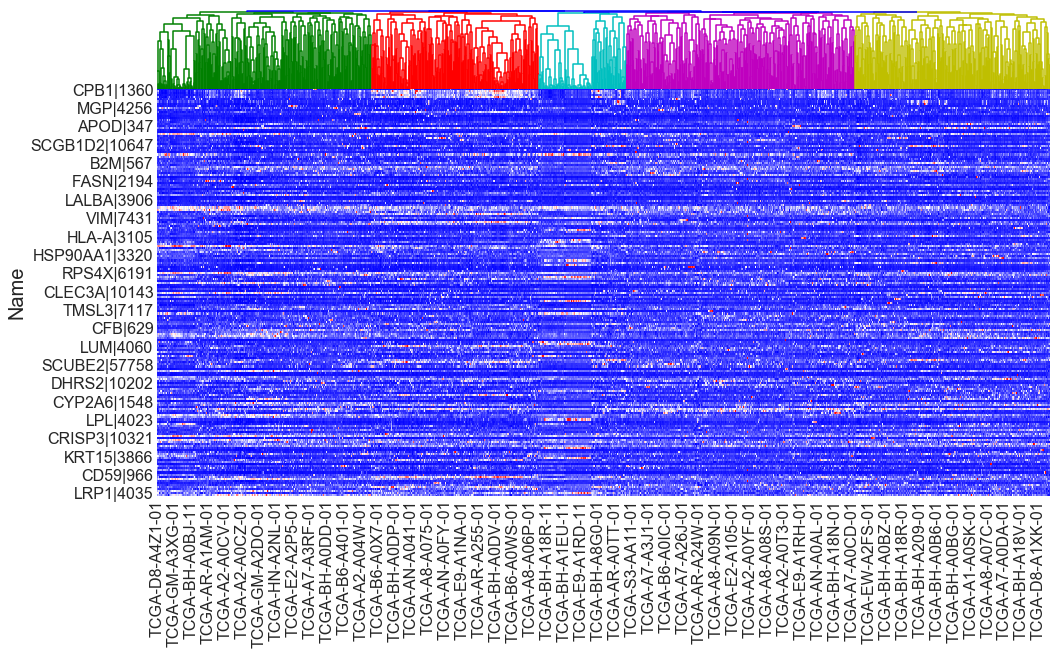

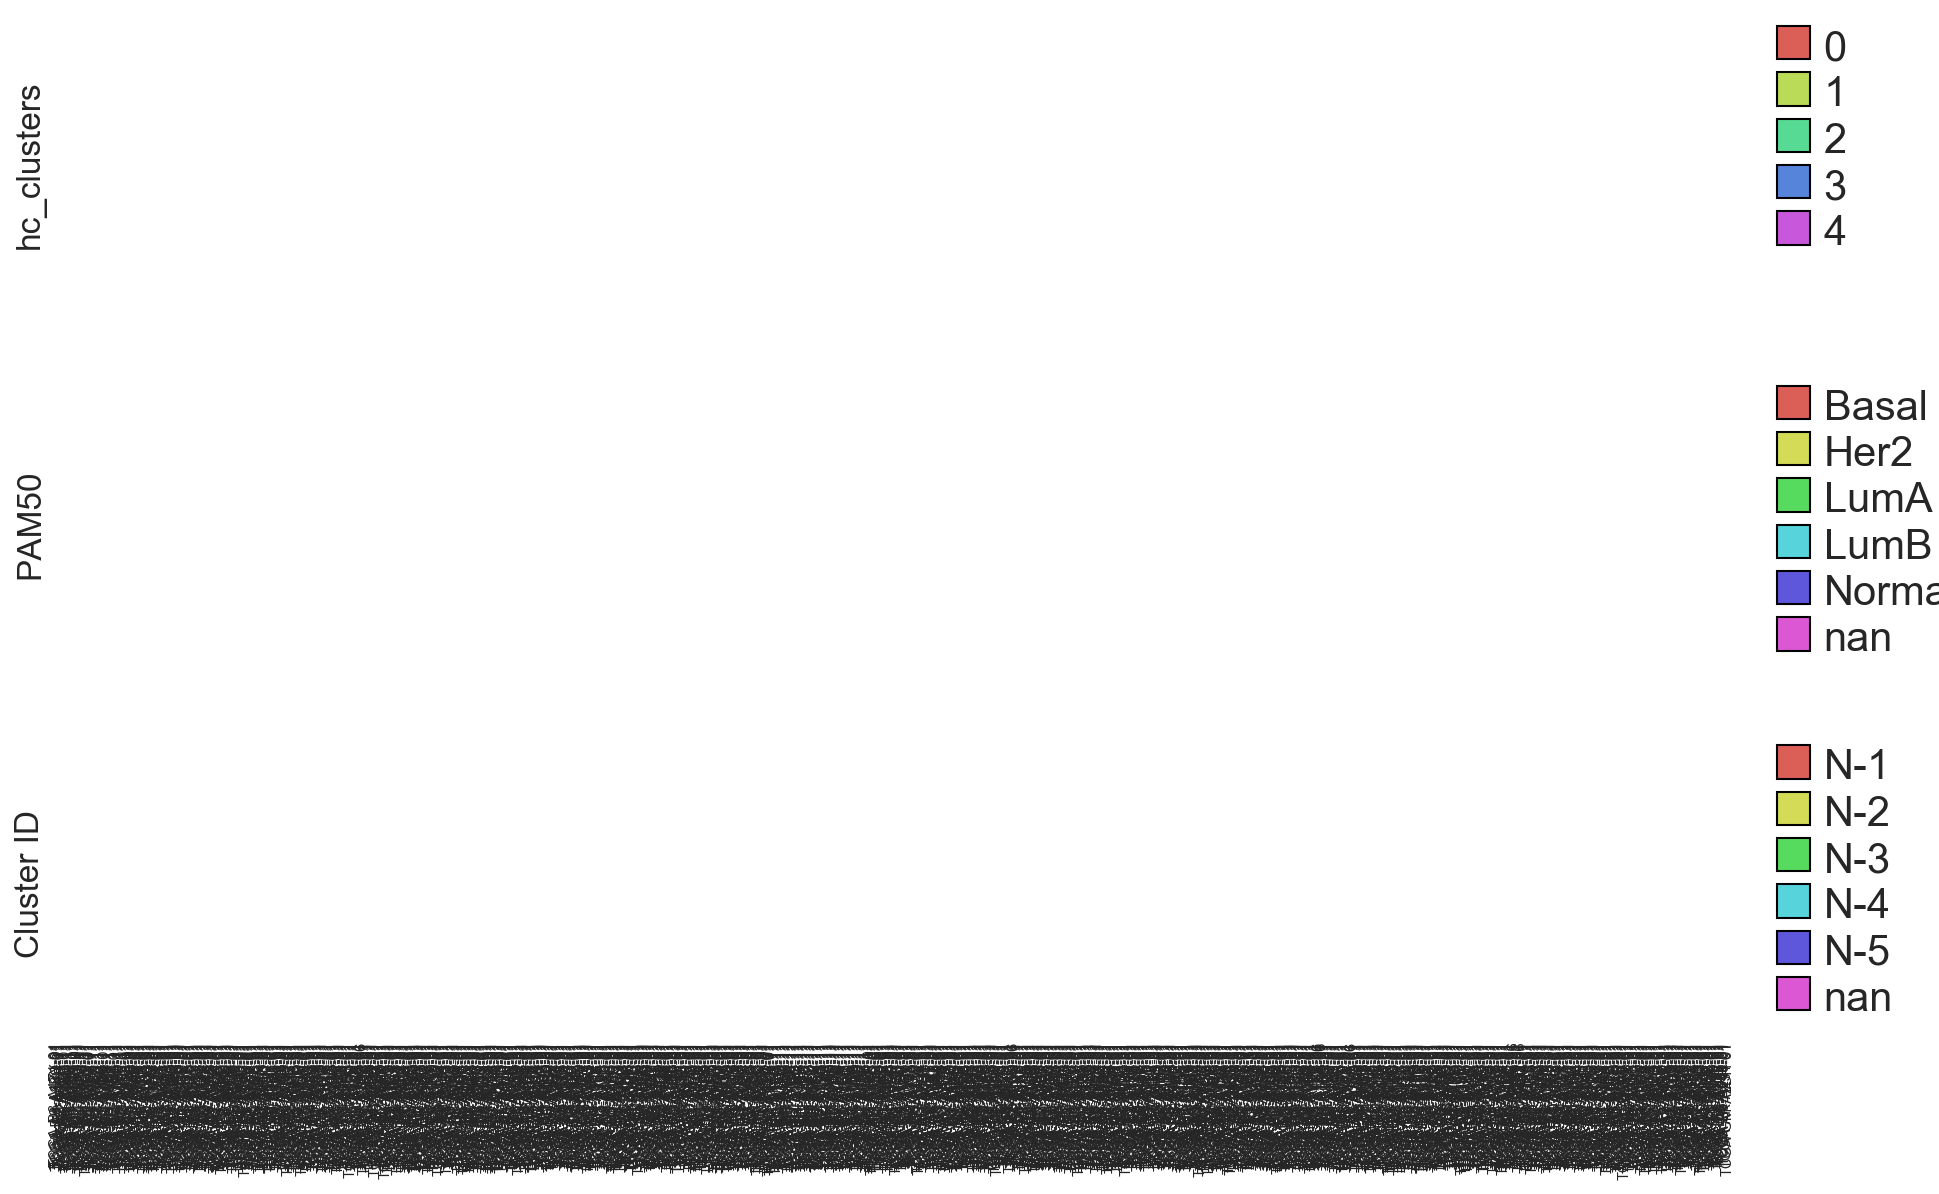

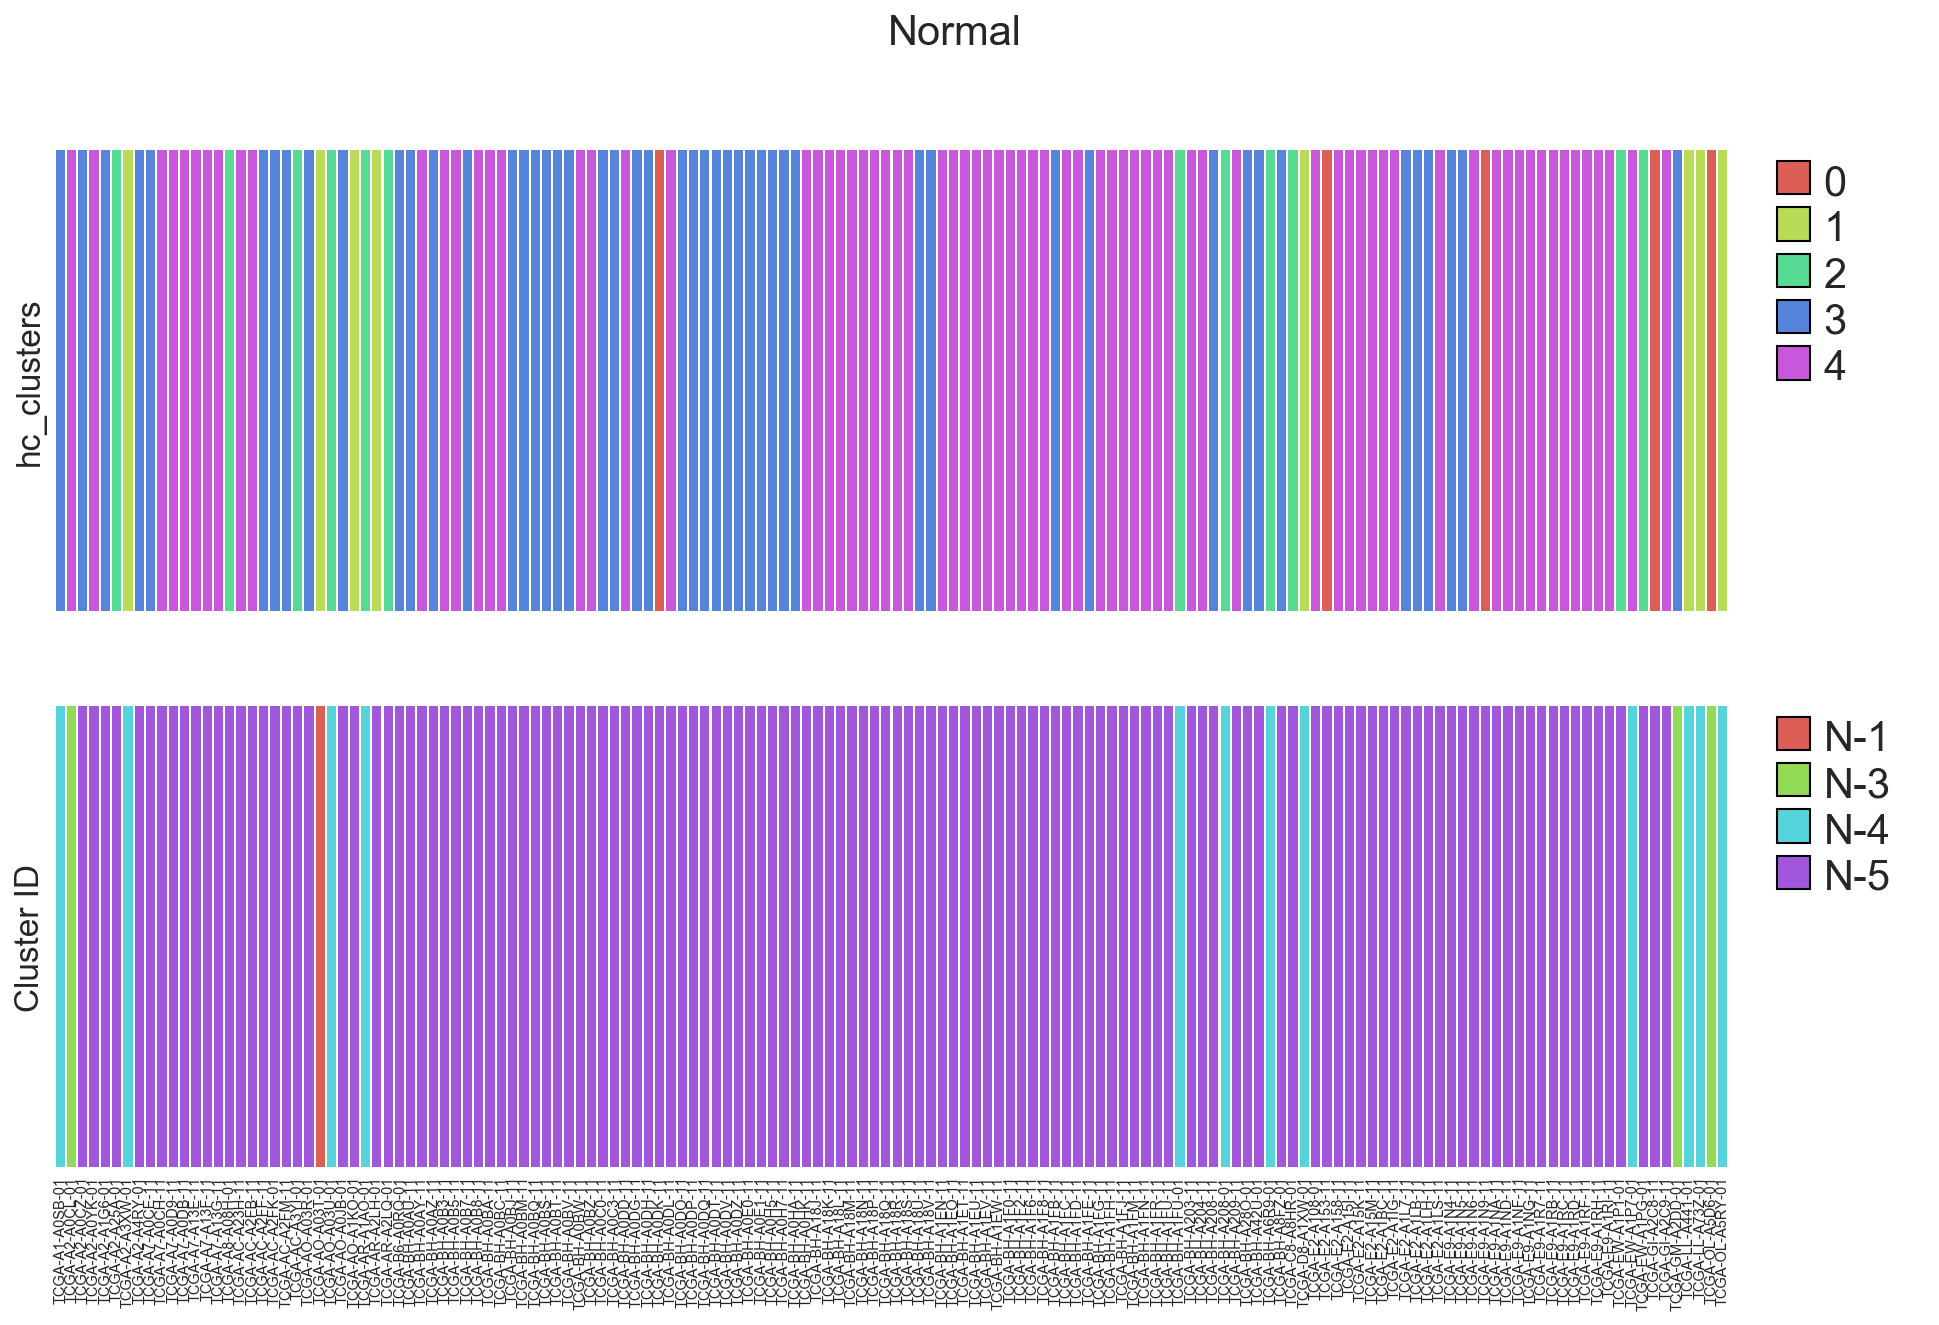

LumA


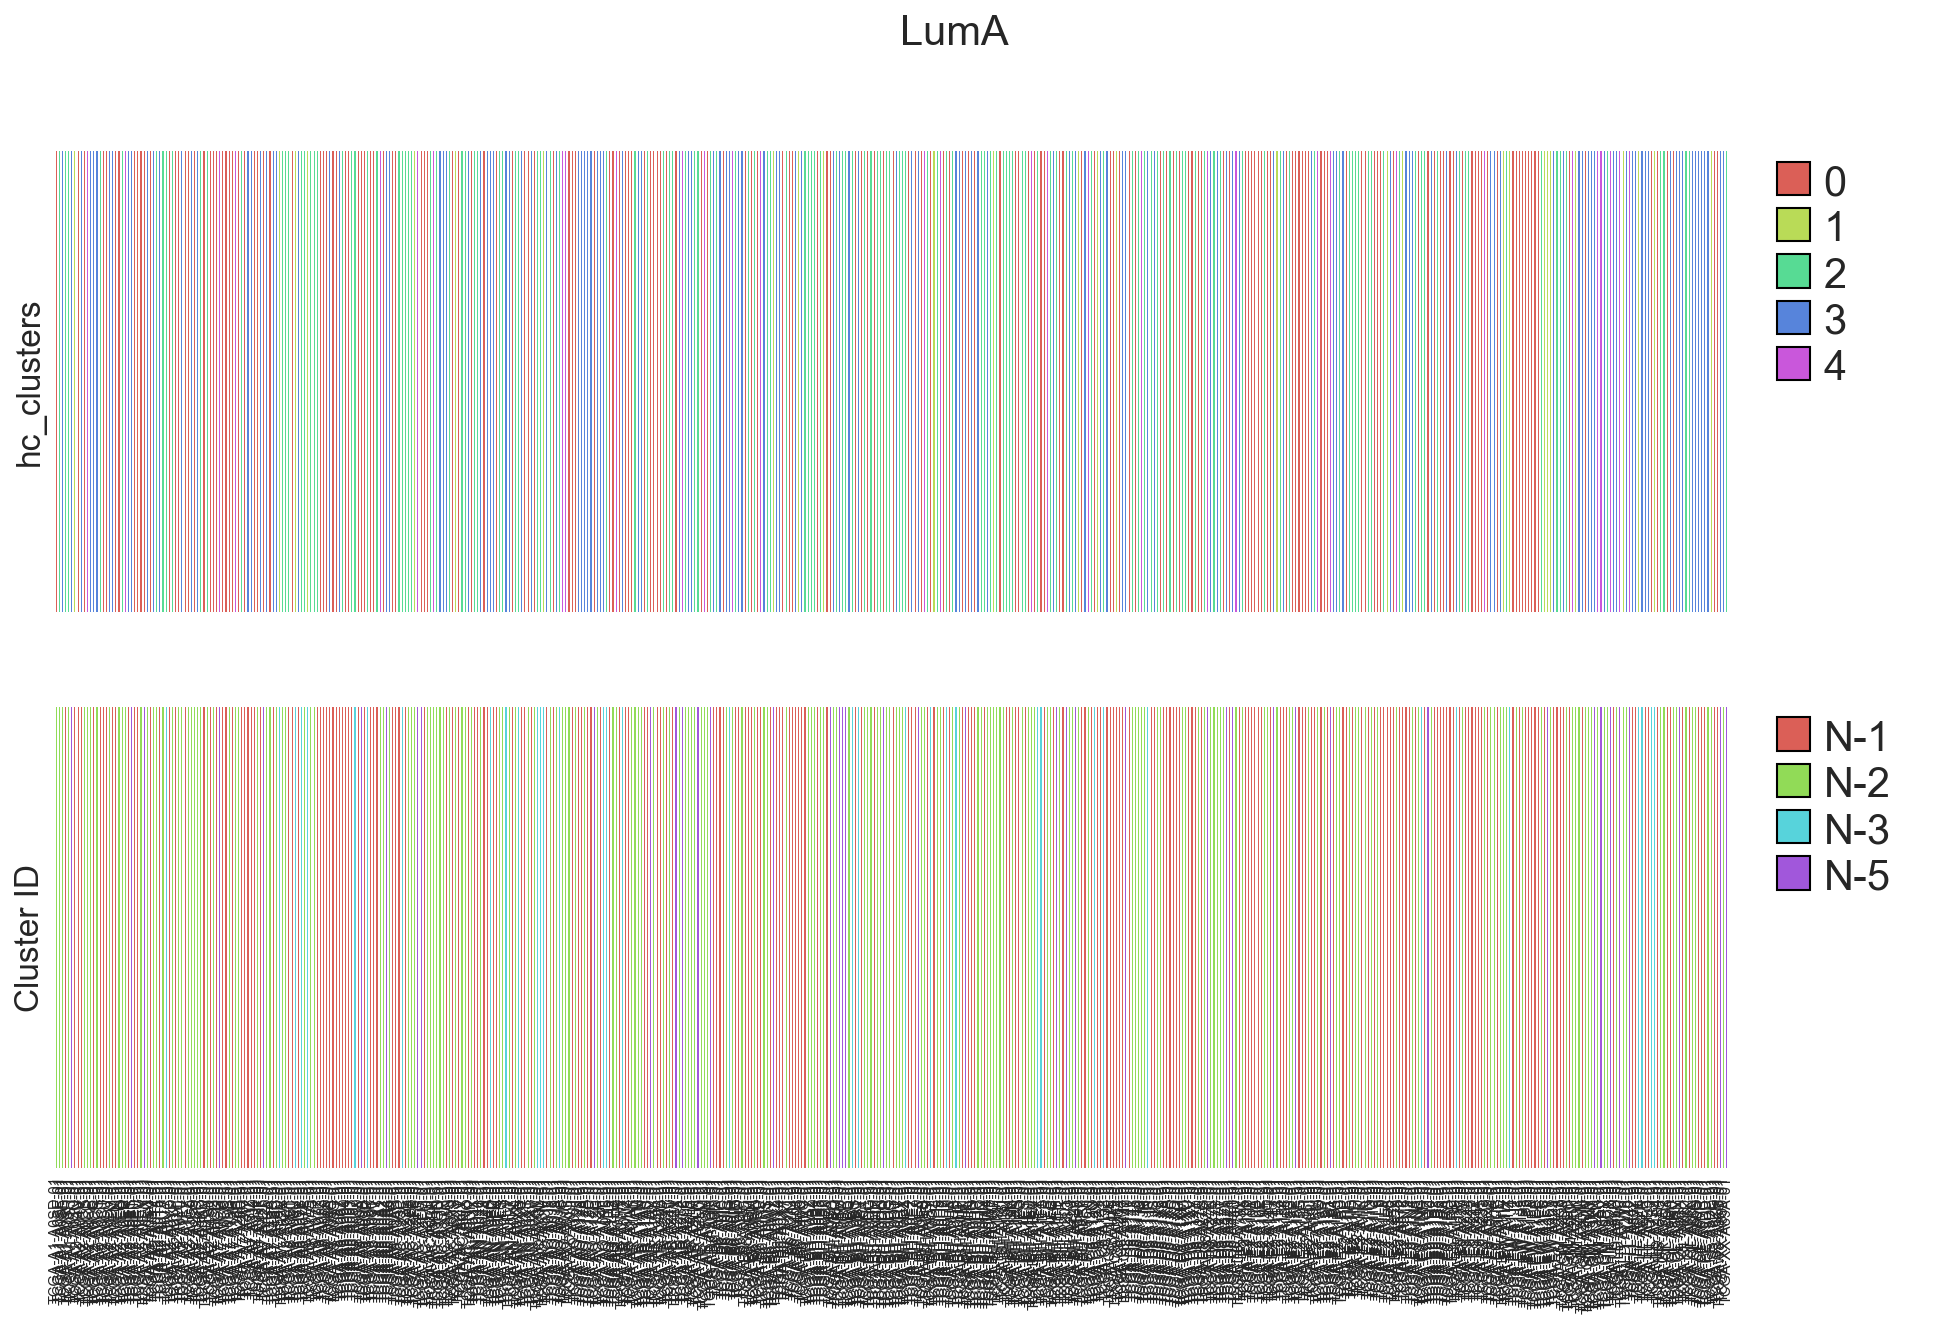

LumB


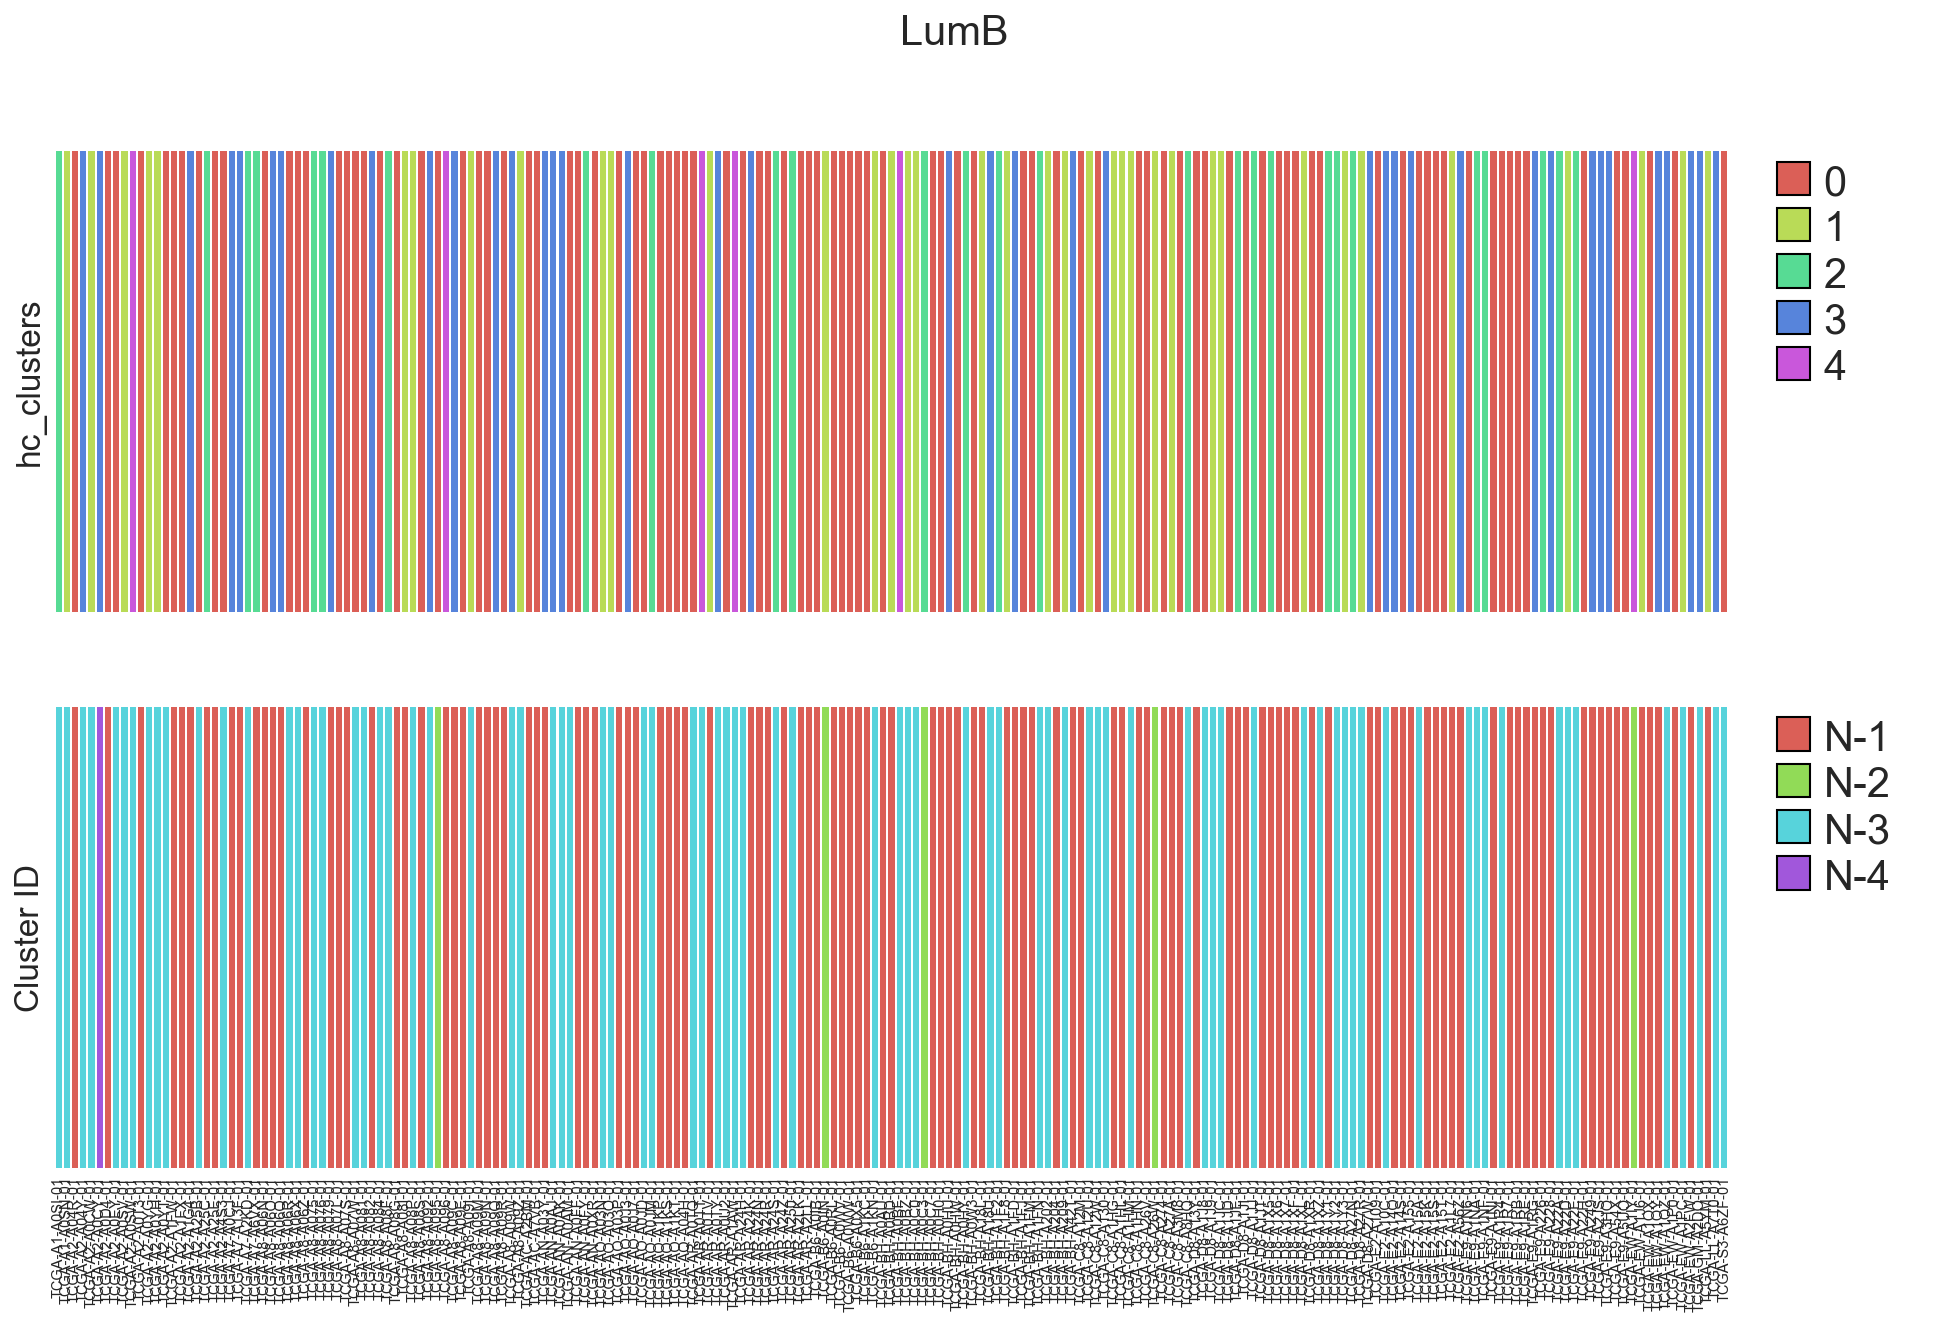

Basal


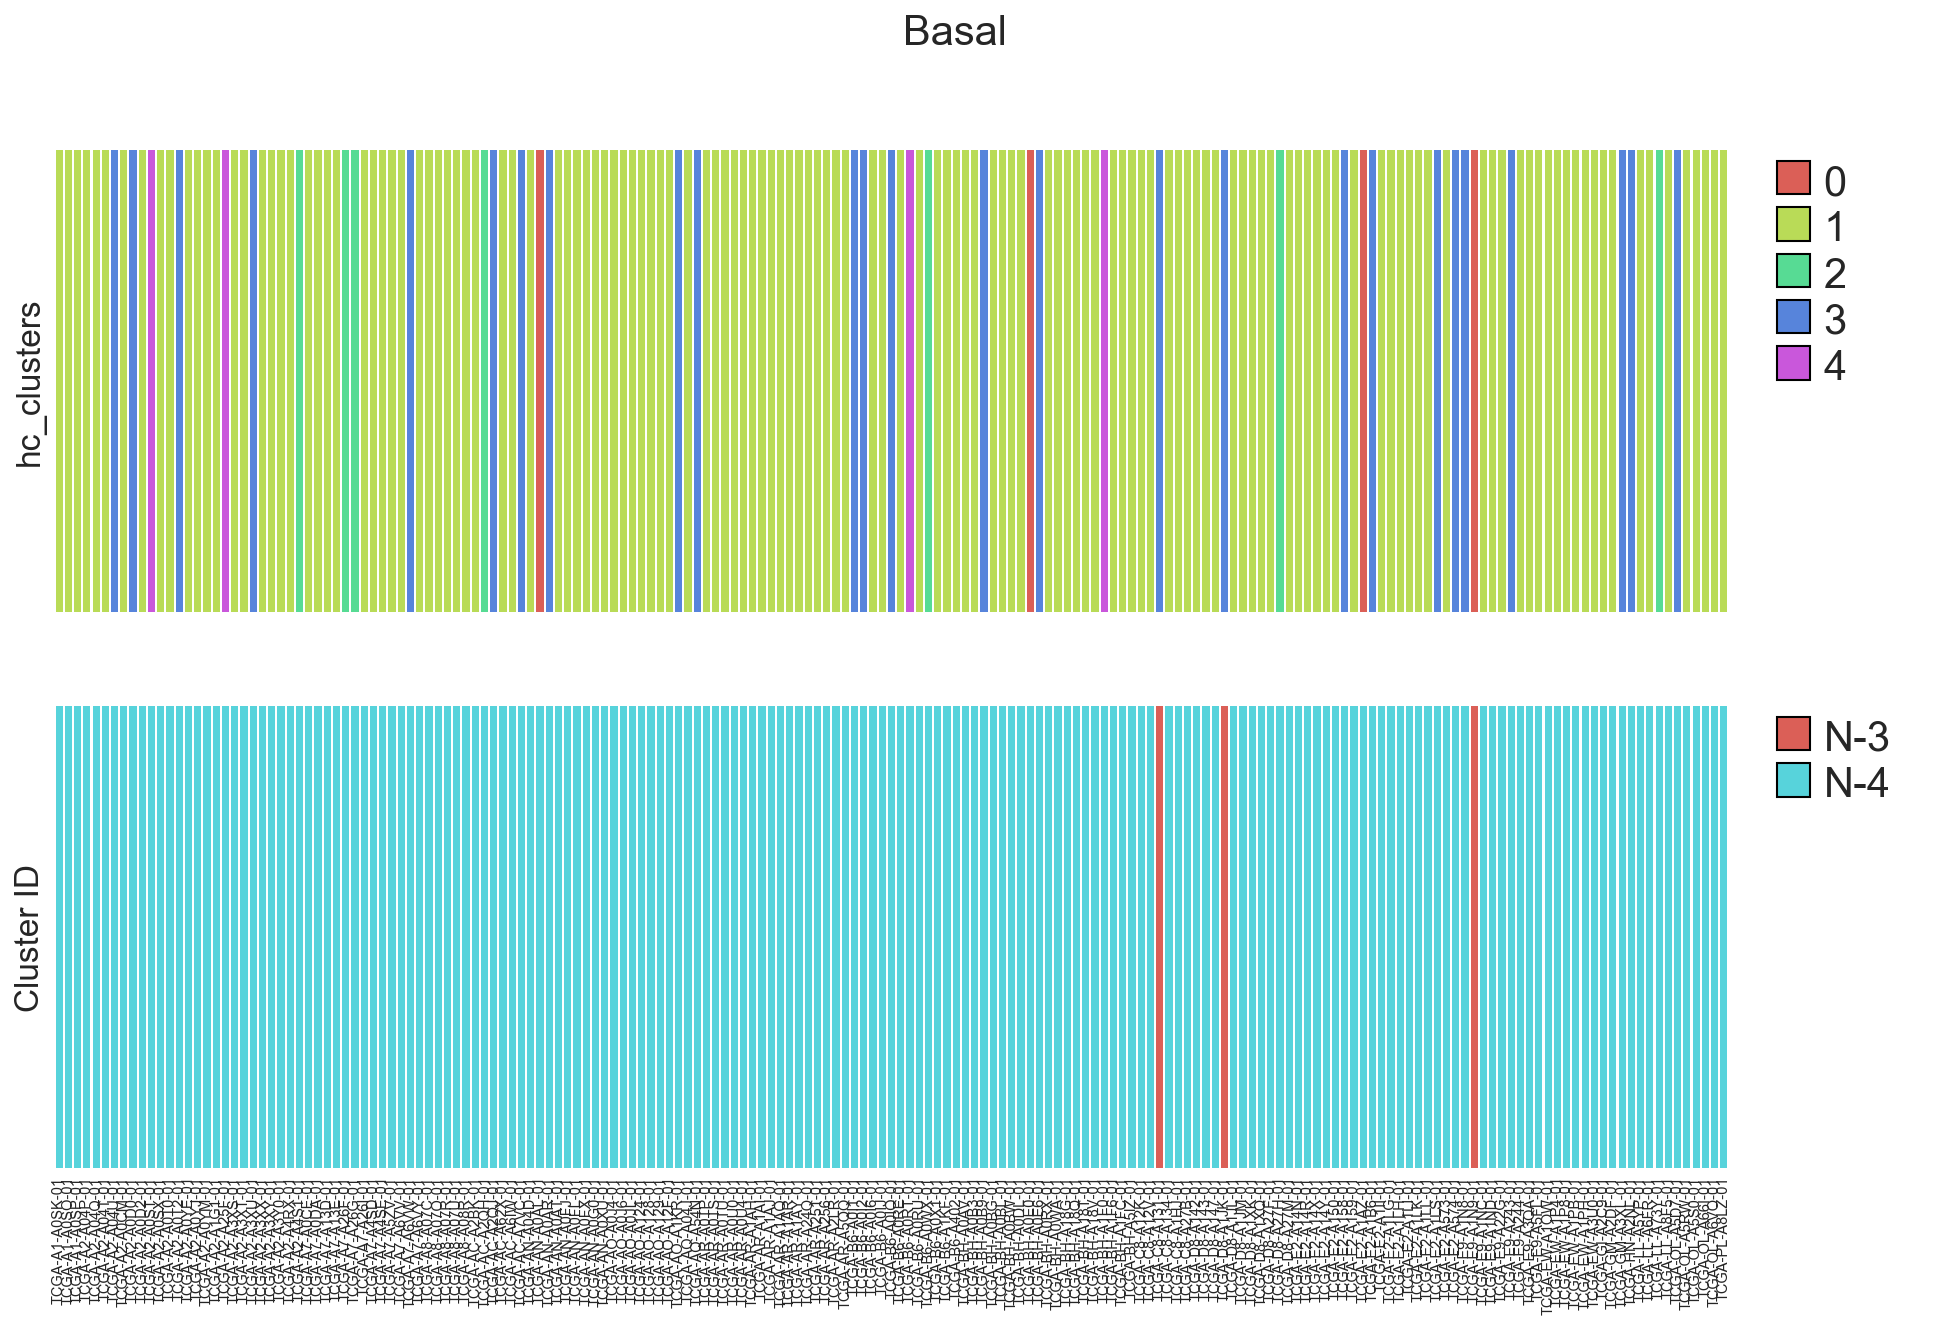

Her2


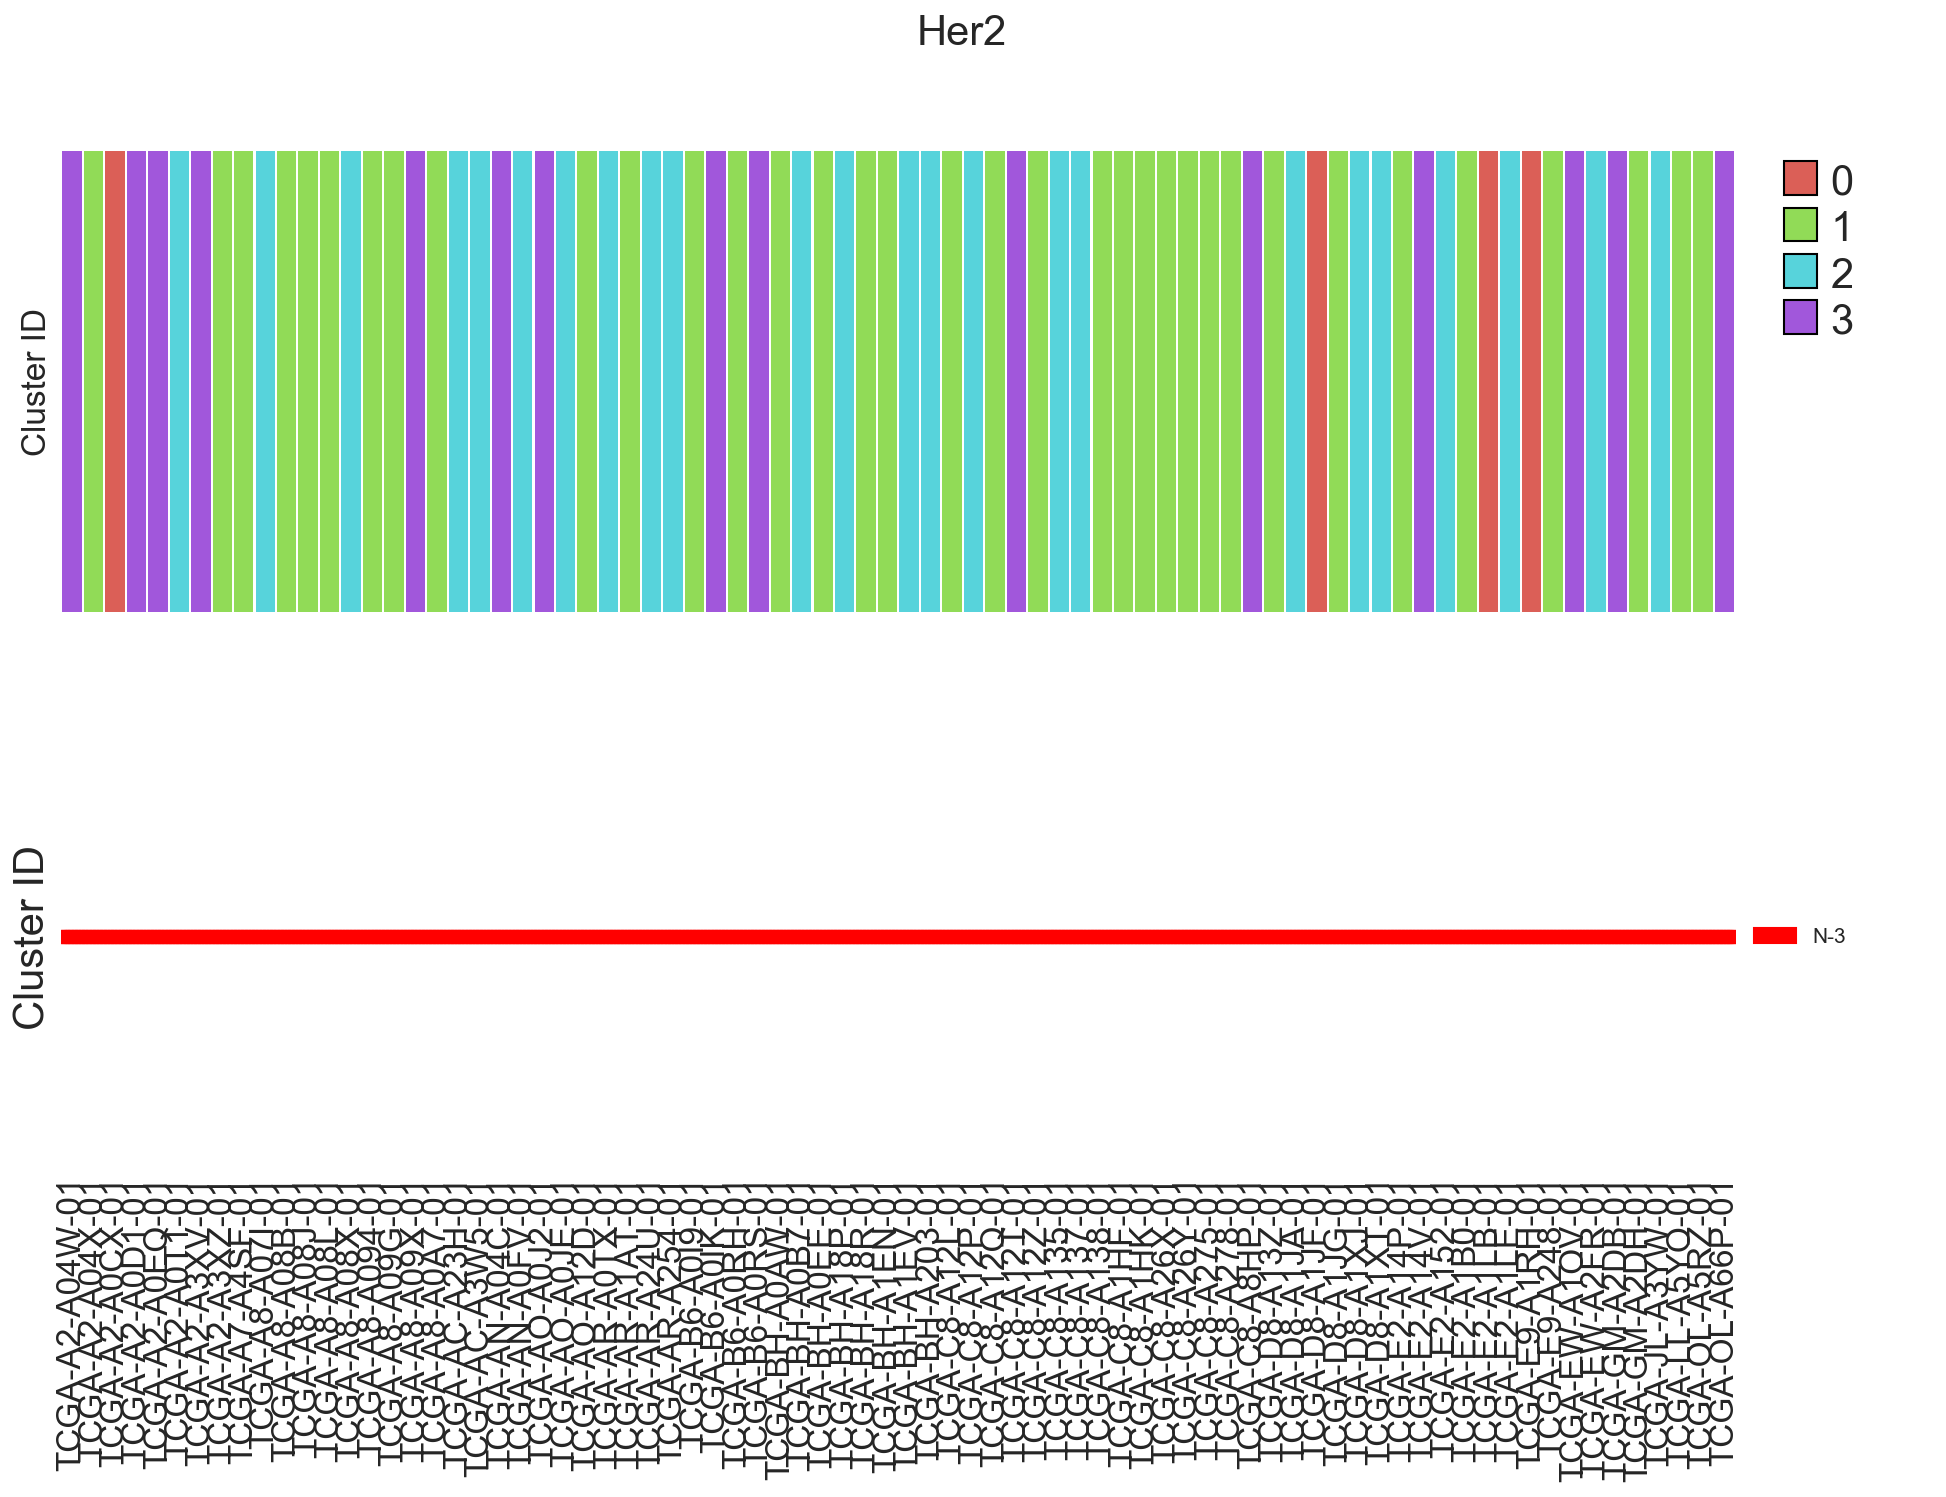

In [113]:
base_name = 'HC_RSEM_output_pearson'
model = cusca.HierarchicalClustering(pwd = '.',
                              gct_name = rna,
                              col_distance_metric = 'pearson',
                              row_distance_metric = 'No_row_clustering',
                              clustering_method = 'complete',#'average',
                              output_base_name = base_name,
                              row_normalization = True,
                              col_normalization = True,
                              row_centering = 'Mean',
                              col_centering = 'Mean',
                              output_distances=False,
                              custom_plot = 'Samples',
                              clusters_to_highlight = 5,
                              show = True)
print("Done with Hierarchical Clustering!")

f = open(base_name+'.cls')
f.readline()
f.readline()
hc_clusters = f.readline().strip('\n').split(' ')
f.close()

hc_df = pd.DataFrame(columns=list(rna))
hc_df.loc['hc_clusters',:] = hc_clusters
# hc_df.apply(lambda x: ['hc-'+i for i in x], axis=1)
hc_df


# netanely[['Cluster ID','PAM50']].transpose()


in_common = list(set(netanely.index) & set(hc_df))
print(len(in_common))
netanely_ids = netanely[['Cluster ID','PAM50']].transpose()[in_common]
netanely_ids

hc_df.loc['PAM50'] = netanely_ids.loc['PAM50']
hc_df.loc['Cluster ID'] = netanely_ids.loc['Cluster ID'].apply(lambda x: 'N-'+str(x))

hc_df

# Read CDT file for ordering of columns
f = open(base_name+'.cdt')
ordered_samples = [i for i in f.readline().strip('\n').split('\t') if ((i!='ID') and (i!='Name') and (i!='GWEIGHT') and (i!='GID') )]
ordered_samples = [i for i in reversed(ordered_samples)]
f.close()
# print(ordered_samples)

print(len(list(hc_df[ordered_samples])))
hc_df[ordered_samples]

# plt.figure(dpi=300, figsize=(16,9))

f, axs = plt.subplots(3, 1, sharex=True, dpi=150, figsize=(16,9))
# f.set_figsize=(16,9)
# f.set_dpi=300

i = 0
for row in hc_df.index:
    a = catheat.heatmap( hc_df[ordered_samples].loc[[row],:], ax=axs[i], 
                        xticklabels=True, yticklabels=False, linewidths=.5)
    a.tick_params(labelsize=7)
    plt.setp(a.get_legend().get_texts(), fontsize='20') # for legend text
    a.set_ylabel(row,fontsize=16)
    for handle in a.get_legend().legendHandles:
        handle.set_height(16)
    i+=1

f.savefig('BRCA.pdf',dpi=600)

def plot_1D_1L_heatmap(axis, prev_ax, how_many, data, label):
    xmin, xmax = prev_ax.get_xlim()
    x = np.linspace(xmin, xmax, num=how_many)
    axis.scatter(x,np.zeros(how_many), color='r', marker='s')
    axis.set_xticklabels(list(data), rotation=90)
    axis.get_yaxis().set_ticks([])
    axis.set_ylabel(data.index[0])
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.spines['bottom'].set_visible(False)
    axis.spines['left'].set_visible(False)
    
    legend_elements = [Patch(facecolor='r', edgecolor='r', label=label)]
    # Shrink current axis by 20%
    box = axis.get_position()
    axis.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    # Put a legend to the right of the current axis
    axis.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    return a

based_on = 'PAM50'
# based_on = 'hc_clusters'
for cat in [j for j in hc_df.loc[based_on].unique() if pd.notna(j)]:
# for cat in [j for j in hc_df.loc['PAM50',:].unique() if j!='Her2']:
# for cat in ['Basal']:
    print(cat)
    which_ones = [i for i in hc_df if hc_df.loc[based_on,i]==cat]
#     print(which_ones)
#     print(hc_df[which_ones])
    f, axs = plt.subplots(2, 1, sharex=True, dpi=150, figsize=(16,9))
    plt.suptitle(cat, fontsize=20)
    i =0
    for row in [i for i in hc_df.index if i!=based_on]:
        if len(pd.unique(hc_df[which_ones].loc[row]))==1:
            a = plot_1D_1L_heatmap(axis=axs[i], prev_ax=a, how_many=len(list(hc_df)),data=hc_df[which_ones].loc[[row],:],
                                  label= pd.unique(hc_df[which_ones].loc[row])[0])
        else:
            a = catheat.heatmap( hc_df[which_ones].loc[[row],:], ax=axs[i], xticklabels=True, 
                                yticklabels=False, linewidths=.5)  
        a.tick_params(labelsize=7)
        plt.setp(a.get_legend().get_texts(), fontsize='20') # for legend text
        a.set_ylabel(row,fontsize=16)
        for handle in a.get_legend().legendHandles:
            handle.set_height(16)
        i+=1
    plt.show()

# Next steps?

- Try k-means clusterign to see if we get the same results